<h1 style='color: 	#1f1f7a; font-size: 34px; font-weight: bold;'> Semantix - Desafio Data Science 
<hr style='border: 2px solid  #1f1f7a;'>


<hr>


<p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<b>Nome do candidato:</b>  Victor Coelho Geraldo</p>

<p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'> 
<b>Vaga pretendida:</b>  Cientista de dados </p>


<p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'> 
<b>Data:</b> 10 de julho de 2019 </p>


<hr>

<p style='margin: 50px 50px;'> 
    




# <font color=#5c5cd6 style='font-size: 30px;'>  Objetivo   </font>
<hr style='border: 2px solid 	#5c5cd6;'>

<hr>

<p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
Explorar dados referentes aos clientes de um banco que participaram de uma campanha de marketing. </p>    

<hr>





# <font color=#5c5cd6 style='font-size: 30px;'> Preparação inicial </font>
<hr style='border: 2px solid #5c5cd6;'>


### Importando bibliotecas 

In [1]:
import pandas as pd       

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sb

In [4]:
from scipy import stats

### Importando o conjunto de dados

In [5]:
clientes = pd.read_csv('bank-full.csv', sep = ';')

In [6]:
clientes.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


<hr>
<p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
    <b>Comentário:</b> No arquivo <i>“bank-names.txt”</i> é informado que não há valores ausentes neste conjunto de dados. Deste modo, não será preciso tratar/filtrar os dados antes da etapa de análise. </p>    
<hr>

# <font color=#5c5cd6 style='font-size: 30px;'> Questões </font>
<hr style='border: 2px solid #5c5cd6;'>


<hr>
<p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
As questões propostas no desafio serão respondidas abaixo. </p>    
<hr>

## <font color = 'purple'> Questão 1:</font>
<hr style = 'border: 1px solid purple;'>

<p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<b>Enunciado:</b> Qual profissão tem mais tendência a fazer um empréstimo? De qual tipo?      </p>    


<hr>

### Estratégia de solução:

<p style='margin: 30px 30px;'> 

<p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
    <b>Nota:</b> Os empréstimos estão separados em duas categorias: imobiliário e pessoal. </p>


<p style='margin: 30px 30px;'> 


<p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'> 
Os clientes serão divididos entre as categorias de profissão. Dentro de  cada categoria, será calculada a porcentagem de clientes que possuem um empréstimo, seja ele imobiliário e/ou pessoal. A profissão que apresentar o maior valor da porcentagem calculada será definida como aquela que possui a maior tendência a realizar um empréstimo. </p>


<p style='margin: 30px 30px;'> 


<p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'> 
Os cálculos são feitos a seguir: </p>    



<hr>

In [7]:
#Obtendo as profissões consideradas no estudo
profissoes = clientes['job'].drop_duplicates()

profissoes = profissoes.tolist()

In [8]:
#Para cada profissão, será contabilizada a porcentagem de clientes que contraiu um empréstimo 

porcent_emprestimos = []

for cont in profissoes:
    
    #Filtrando os clientes para uma dada profissão dentro da lista profissoes
    clientes_prof  = clientes[clientes['job'] == cont] 
    
    #Operador lógico dentro de "clientes_prof"  para determinar os clientes que realizaram no mínimo um empréstimo
    log = (clientes_prof['housing']  == 'yes') | (clientes_prof['loan']  == 'yes')  
    
    #Calculo das porcentagens de clientes por profissão que contrairam no minimo 1 emprestimo
    porcent_emprestimos.append( round(100.0*(clientes_prof[log].shape[0]/clientes_prof.shape[0]),2 ))
   
    

In [9]:
#Construindo um Data Frame com os resultados obtidos

emprestimo_por_profissao = pd.DataFrame({'Profissao': profissoes, 'Emprestimo (%)': porcent_emprestimos}, \
                                        index = ['']*len(profissoes) , \
                                        columns = ['Profissao', 'Emprestimo (%)']).sort_values(by='Emprestimo (%)')

#Mostrando os resultados
emprestimo_por_profissao 

,Profissao,Emprestimo (%)
,unknown,9.72
,student,27.40
,retired,30.87
,housemaid,39.52
,unemployed,45.20
,self-employed,54.72
,management,55.24
,technician,60.66
,entrepreneur,68.33
,admin.,69.02


<hr>
<p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
    <b>Comentário:</b> Tabela mostrando as porcentagens dos clientes que contraíram um empréstimo, calculadas para cada uma das  profissões isoladamente.  </p>   
    
<p style='margin: 30px 30px;'>     

<p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
Será construído um gráfico de barras para facilitar a visualização destes dados: </p>

    
<hr>

### Apresentando os resultados num gráfico de barras

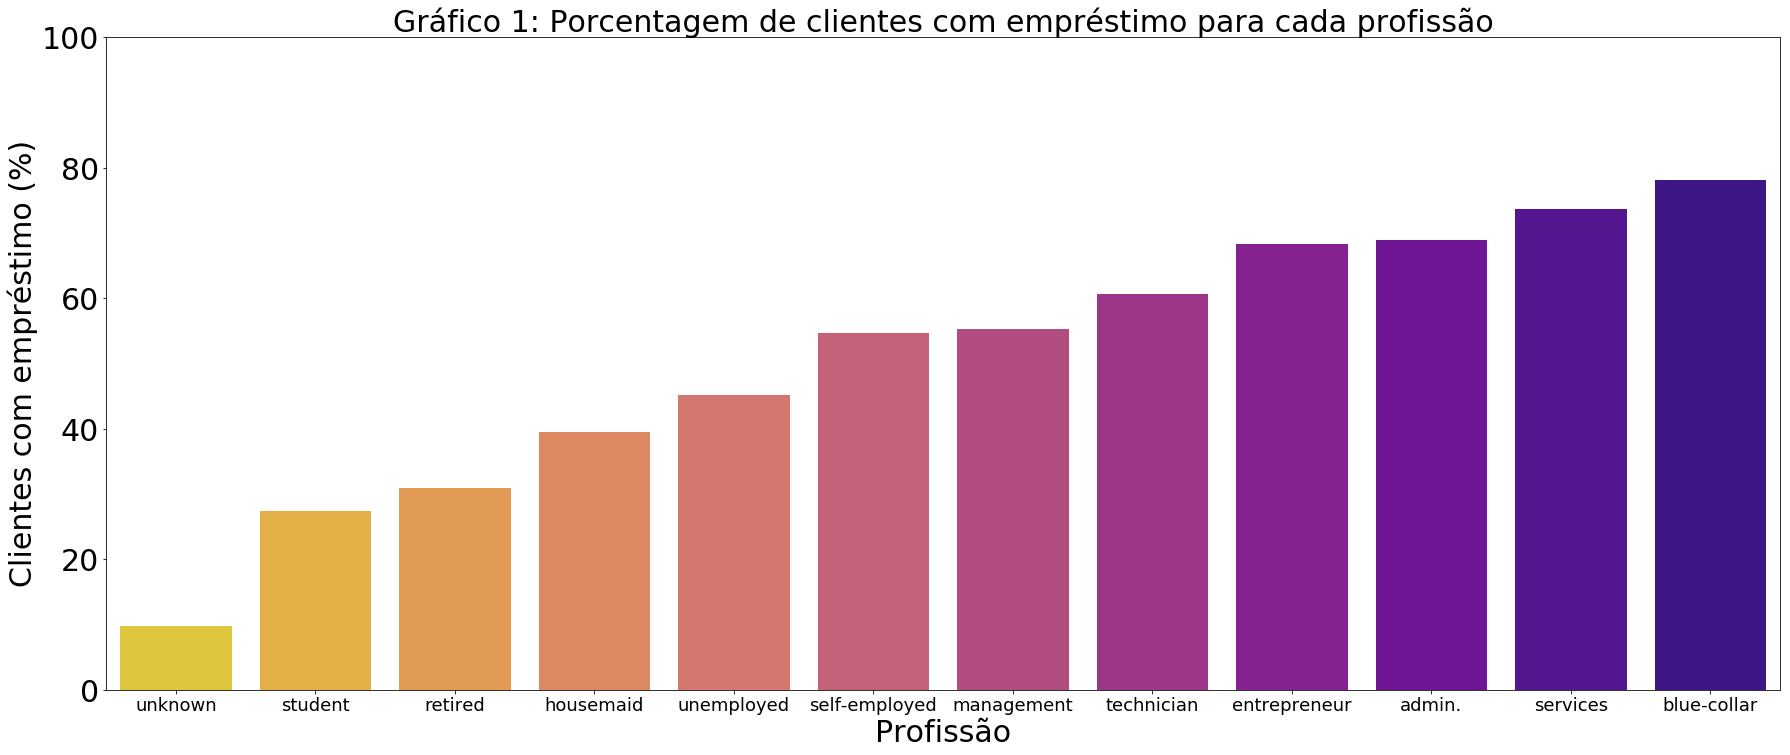

In [10]:
#--Estética do gráfico

plt.figure(figsize=(30,12)) #Tamanho do gráfico 

plt.tick_params(axis = 'x', labelsize = 18) #Tamanho dos números do eixo y

plt.tick_params(axis = 'y', labelsize = 30) #Tamanho dos números do eixo y

plt.ylim((0,100)) #Definindo limites do eixos y


#--Construindo o gráfico de barras
graf_barras = sb.barplot(x='Profissao', y='Emprestimo (%)', data = emprestimo_por_profissao,  palette="plasma_r")


#--Modificando legenda dos eixos e inserindo título no gráfico
plt.xlabel('Profissão',fontsize = 30)
plt.ylabel('Clientes com empréstimo (%)',fontsize = 30)
plt.title('Gráfico 1: Porcentagem de clientes com empréstimo para cada profissão',fontsize = 30)

#--Definindo o estilo do gráfico

sb.set_style("darkgrid")


<hr>

<p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
    <b>Comentário:</b> A profissão <i>"blue-collar"</i> (<i>i.e.</i>, operário; tradução livre) apresenta a maior tendência a realizar um empréstimo. Agora, é necessário avaliar para a profissão <i>"blue-collar"</i> qual o tipo de empréstimo é o mais realizado.</p>


<hr>

### Determinando o tipo de empréstimo preferido

In [11]:
#--Coletando dados para a profissão "blue-collar"
clientes_bluecollar = clientes[clientes['job'] == 'blue-collar']

<hr>

<p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
    <b>Comentário:</b> Os clientes cuja a profissão é <i>"Blue-collar"</i> serão dividios em 4 categorias:</p>

<ul> 
    
<li> <p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'><b>Housing:</b> Clientes que contraíram apenas empréstimo imobiliários;</li>     
    
   
<li> <p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'><b>Loan:</b> Clientes que contraíram apenas empréstimo pessoal; </li> 

<li> <p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'><b>Ambos:</b> Clientes que contraíram empréstimos imobiliário e pessoal; </li>   

<li> <p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'><b>Nenhum:</b> Clientes que não contraíram empréstimos. </li>   
 
</Ul>    

<p style='margin: 30px 30px;'>
    
<p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'> 
Será calculada a porcentagem de clientes em cada uma dessas 4 categorias de situação de empréstimo:



<hr>

In [12]:
#--Definindo lista que conterá os nomes das categorias 
nome_categorias = ['Housing', 'Loan', 'Ambos', 'Nenhum']

#--Definindo lista que coletará as porcentagens de clientes em cada uma das categorias
porcent_categorias = []

In [13]:
#--Porcentagem de clientes nas 4 categorias

for cont in nome_categorias:
    
    
    if cont != 'Nenhum':
        
        if cont == 'Housing':
            
            #Operação lógica dentro "clientes_bluecollar" para clientes da catergoria Housing
            log = (clientes_bluecollar['housing']  == 'yes') & (clientes_bluecollar['loan']  == 'no') 
            
            
        elif cont == 'Loan':
            
            #Operação lógica dentro "clientes_bluecollar" para clientes da catergoria Loan
            log = (clientes_bluecollar['housing']  == 'no') & (clientes_bluecollar['loan']  == 'yes') 
            
        else:
            
            #Operação lógica dentro "clientes_bluecollar" para clientes da catergorua Ambos
            log = (clientes_bluecollar['housing']  == 'yes') & (clientes_bluecollar['loan']  == 'yes')

            
            
        #Obtendo clientes para uma dada categoria 
        clientes_BC_categoria = clientes_bluecollar[log]
        
        #Quardando a fração de clientes dentro de uma categoria 
        porcent_categorias.append( round(100.0*clientes_BC_categoria.shape[0]/clientes_bluecollar.shape[0],2))

        
    else:    
        
        #--Porcentagem de clientes na categoria "Nenhum"
        porcent_categorias.append(100.0 - sum(porcent_categorias))


In [14]:
#--Construindo um Data Frame com os resultados obtidos

emprestimos_bluecollar = pd.DataFrame(data = {'Categoria':nome_categorias, '(%)':porcent_categorias}, \
                                    columns = ['Categoria', '(%)']).sort_values(by='(%)')

#Mostrando o resultado
emprestimos_bluecollar

,Categoria,(%)
1,Loan,5.66
2,Ambos,11.64
3,Nenhum,21.92
0,Housing,60.78


<hr>
<p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
    <b>Comentário:</b> Tabela mostrando as porcentagens dos clientes da profissão "blue-collar" em cada uma das categorias de situação de emprestimo.</p>   
    
<p style='margin: 30px 30px;'>     

<p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
Será construído um gráfico de barras para facilitar a visualização destes dados: </p>

    
<hr>

### Apresentando os resultados num gráfico de barras

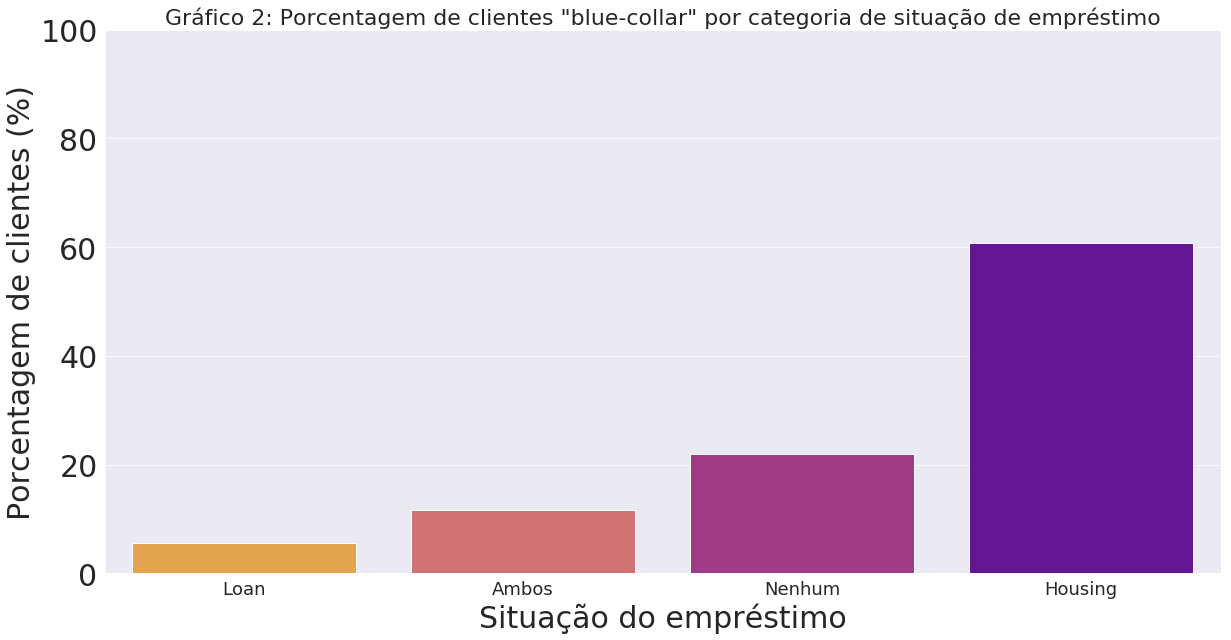

In [15]:
#--Estética do gráfico

plt.figure(figsize=(20,10)) #Tamanho do gráfico 

plt.tick_params(axis = 'x', labelsize = 18) #Tamanho dos números do eixo y

plt.tick_params(axis = 'y', labelsize = 30) #Tamanho dos números do eixo y

plt.ylim((0,100)) #Definindo limites do eixos y


#--Construindo o gráfico de barras
graf_barras = sb.barplot(x='Categoria', y='(%)', data = emprestimos_bluecollar,  palette="plasma_r")


#--Modificando legenda dos eixos e inserindo título no gráfico
plt.xlabel('Situação do empréstimo',fontsize = 30)
plt.ylabel('Porcentagem de clientes (%)',fontsize = 30)
plt.title('Gráfico 2: Porcentagem de clientes "blue-collar" por categoria de situação de empréstimo',fontsize = 22)

#--Definindo o estilo do gráfico

sb.set_style("darkgrid")

<hr>
<p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
    <b>Comentário:</b> Somando os resultados das categorias "Ambos" e "Housing", chega-se a conclusão que os clientes com profissão "blue-collar" realizam mais empréstimos do tipo Imobiliário. </p>   
    
<p style='margin: 30px 30px;'>     

<hr>

<p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<b>Resposta questão 1:</b> Entre todas as profissões, os clientes blue-collar são os que possuem a maior tendência de realizar um empréstimo. Para os clientes “blue-collar”, há uma maior tendência de se contrair empréstimos imobiliários. 


</p>


<hr>

## <font color = 'purple'> Questão 2:</font>
<hr style = 'border: 1px solid purple;'>

<p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<b>Enunciado:</b> Fazendo uma relação entre número de contatos e sucesso da campanha quais
são os pontos relevantes a serem observados?</p>  

<hr>

### Estratégia de solução:

<p style='margin: 30px 30px;'> 



<p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'> 
A relação entre o número de contatos e o sucesso na campanha será explorada em duas etapas.</p>
  
<p style='margin: 30px 30px;'> 
 
 
<p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'> 
Primeiramente, os clientes serão avaliados como um todo, não os discriminando por quantidade de chamadas recebidas. Desse modo, será avaliada a porcentagem de sucesso para cada uma das quantidades de contatos feitos durante a campanha. Vale frisar que essa porcentagem será calculada em relação ao total de sucessos do conjunto completo de dados. Nessa etapa, também será avaliada a porcentagem acumulada de sucessos ao longo das quantidades de chamadas realizadas.
 </p>


<p style='margin: 30px 30px;'> 


<p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'> 
Na segunda etapa, os clientes serão agrupados por quantidade de chamadas  recebidas durante a campanha. Dentro de cada grupo, será calculada a porcentagem de sucesso. Assim, será possível obter a taxa de sucesso, ou melhor, conversão dentro de cada um dos grupos.  </p>    

<p style='margin: 30px 30px;'> 


<p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'> 
Os cálculos são feitos a seguir: </p>    


<hr>


<p style='margin: 30px 30px;'> 

### Etapa 1: Análise no conjunto total de dados

In [16]:
#--Construindo uma lista com todas as quantidades de contados observados ao longo deste estudo 
quant_contatos = sorted(clientes['campaign'].drop_duplicates().tolist())

In [17]:
#--Computar o número de sucessos e a porcentagem em relação aos sucessos totais do conjunto completo
#--para cada uma das quantidades de contatos observados

quant_sucessos   =  []  #Lista que guardará a QTD sucessos

porc_tot_sucessos = []  #Lista que guardará a porcentagem em rela. sucessos totais

for cont in quant_contatos:
    
    #Operador logico para filtrar os dados 
    log  = (clientes['campaign'] == cont) & (clientes['y'] == 'yes')
    
    #Povoando lita de QTD de sucessos 
    quant_sucessos.append(clientes[log].shape[0])
    
    #Povoando lista % em relação ao total de sucesso
    porc_tot_sucessos.append(round(100.0*clientes[log].shape[0]/clientes[ clientes['y'] =='yes'].shape[0],2))
    

In [18]:
#--Construindo dados de probabilidade acumulada

prob_acumulada = [] #Lista que guardará a probabilidade acumulada

#Inserindo o primeiro elemento
prob_acumulada.append(porc_tot_sucessos[0])


for cont in porc_tot_sucessos[1:]:
    
    prob_acumulada.append(cont + prob_acumulada[-1])

   

In [19]:
#--Construir um Dataframe com os resultados

sucesso_contatos = pd.DataFrame(data = {'Num. Contatos': quant_contatos, 'Num. Sucessos':quant_sucessos,\
                                        '% dos sucessos': porc_tot_sucessos, '% Acumulada': prob_acumulada}, \
                                         columns= ['Num. Contatos', 'Num. Sucessos','% dos sucessos', '% Acumulada'])


#Mostrando o resultado
sucesso_contatos.head(n = 15)


,Num. Contatos,Num. Sucessos,% dos sucessos,% Acumulada
0,1,2561,48.42,48.42
1,2,1401,26.49,74.91
2,3,618,11.68,86.59
3,4,317,5.99,92.58
4,5,139,2.63,95.21
5,6,92,1.74,96.95
6,7,47,0.89,97.84
7,8,32,0.61,98.45
8,9,21,0.40,98.85
9,10,14,0.26,99.11


<hr>
<p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
    <b>Comentário:</b> Trecho da tabela mostrando os resultados da etapa 1 de análises. A primeira coluna mostra as diferentes quantidades de chamadas realizadas. A quantidade de sucessos e a porcentagem em relação ao total de sucessos são apresentados nas colunas 2  e 3, respectivamente. A quarta coluna mostra a porcentagem acumalativa de sucessos ao longo das quantidades de contatos. </p>   
    
<p style='margin: 30px 30px;'>     

<p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
Os dados desta tabela serão apresentados de forma gráfica para a melhor compreensão dos resultados.  </p>

    
<hr>

#### Gráfico com o número de sucesso por quatidade de chamada

Text(0.5,1,'Gráfico 3: Sucessos totais por chamadas na campanha')

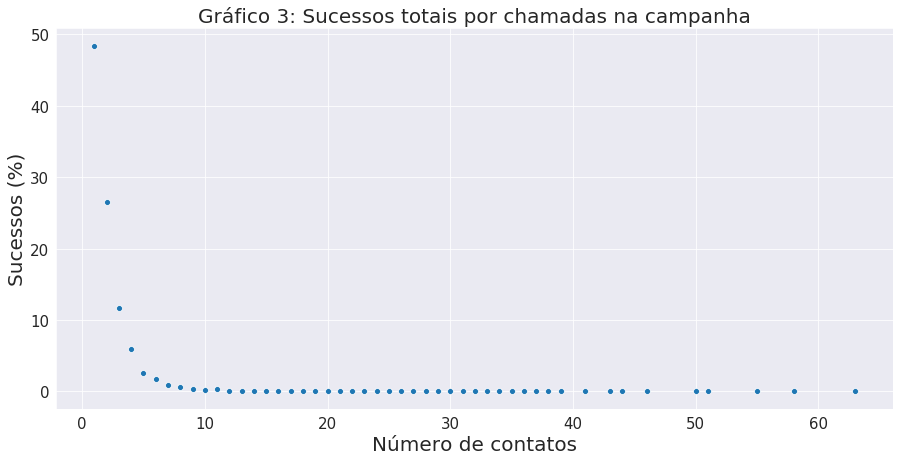

In [20]:
#--Aparência do gráfico

plt.figure(figsize=(15,7)) #Tamanho do gráfico 

plt.tick_params(axis = 'x', labelsize = 15) #Tamanho dos números do eixo y

plt.tick_params(axis = 'y', labelsize = 15) #Tamanho dos números do eixo y

#Construindo um scatter plot

sb.scatterplot(x = 'Num. Contatos', y = '% dos sucessos', data = sucesso_contatos)

#--Modificando legenda dos eixos e inserindo título no gráfico
plt.xlabel('Número de contatos',fontsize = 20)
plt.ylabel('Sucessos (%)',fontsize = 20)
plt.title('Gráfico 3: Sucessos totais por chamadas na campanha',fontsize = 20)

<hr>
<p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
    <b>Comentário:</b> É possível observar que a maioria dos sucessos obtidos (48,4% do total) ocorreu com apenas 1 ligação. A medida que aumenta-se o número de ligações, a porcentagem de sucessos cai rapidamente. Essa queda atinge valores próximos a zero para quantidades acima de 10 ligações.  </p>   
    
<hr>   

#### Grafico com porcentagem acumulativa

Text(0.5,1,'Gráfico 4: Porcentagem aculativa de sucessos por quantidade de contatos')

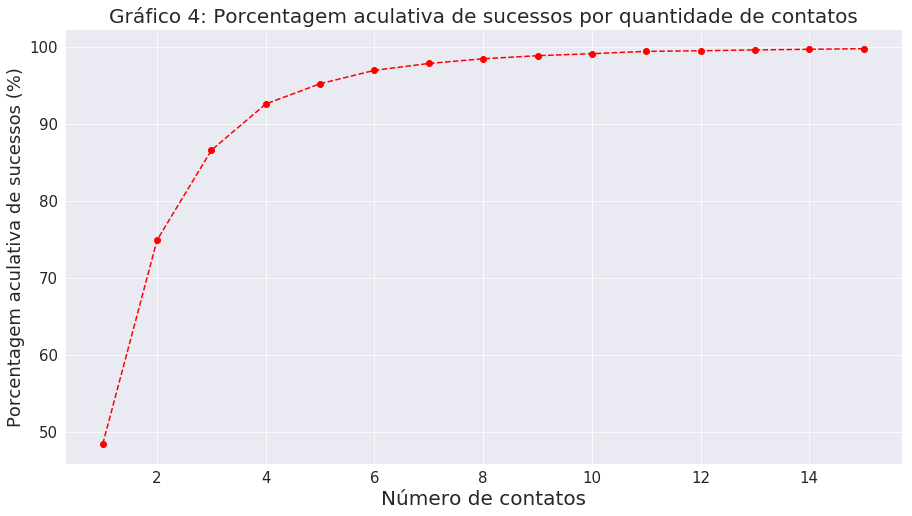

In [21]:
#--Aparência do gráfico

plt.figure(figsize=(15,8)) #Tamanho do gráfico 

plt.tick_params(axis = 'x', labelsize = 15) #Tamanho dos números do eixo y

plt.tick_params(axis = 'y', labelsize = 15) #Tamanho dos números do eixo y


#Construindo um scatter plot

plt.plot(sucesso_contatos['Num. Contatos'].iloc[0:15] ,sucesso_contatos['% Acumulada'].iloc[0:15],'ro--')



#--Modificando legenda dos eixos e inserindo título no gráfico
plt.xlabel('Número de contatos',fontsize = 20)
plt.ylabel('Porcentagem aculativa de sucessos (%)',fontsize = 18)
plt.title('Gráfico 4: Porcentagem aculativa de sucessos por quantidade de contatos',fontsize = 20)



<hr>
<p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
    <b>Comentário:</b> Através deste gráfico, nota-se que aproximadamente 92% dos sucessos obtidos na campanha ocorre para quantidades menores do que 5 contatos. </p>   

<p style='margin: 30px 30px;'> 
    
    
<p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
Contudo, é importante ressaltar que os resultados apresentados nesta etapa sofrem de desbalanceamento na quantidade de dados. Em outras palavras, o número de dados disponíveis decresce rapidamente à medida que aumenta-se o número de chamadas. Como prova disso, basta dizer que 86,5% dos dados referem-se a clientes que receberam menos do que 5 ligações. Com um número maior de dados disponíveis, é óbvio que a maioria dos sucessos estará necessariamente dentro das faixas com menores quantidades de contato. Assim, é necessário avaliar a taxa de sucesso (ou melhor, conversão) para cada uma das quantidades de contatos feitos.    
    
<hr>   

### Etapa 2: Análise da taxa de conversão

<hr>
<p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
    <b>Comentário:</b> Os cálculos abaixo computam a taxa de conversão para cada um dos grupos de quantidades de contatos realizados. 
 </p>   
    
<hr>   

In [22]:
#Criando lista com sucessos relativos
suce_relativo = []

#Criando lista com número de clientes em cada grupo de QTD de contatos
clientes_por_contato = []

for cont in quant_contatos:
    
    #Operador logico para filtrar os dados 
    log  = (clientes['campaign'] == cont) & (clientes['y'] == 'yes')
    
    #Populando lista com sucessos relativos 
    suce_relativo.append(round(100.0*clientes[log].shape[0]/clientes[ clientes['campaign'] == cont].shape[0],2))

    #Populando lista com número de clientes em cada grupo de QTD de contatos
    clientes_por_contato.append(clientes[ clientes['campaign'] == cont].shape[0])
    
    

In [23]:
#--Construir um Dataframe com os resultados

taxa_conversao = pd.DataFrame(data = {'Num_Contatos':quant_contatos, 'Num_Clientes': clientes_por_contato,\
                              'Taxa_Conversao': suce_relativo}, columns= ['Num_Contatos', 'Num_Clientes','Taxa_Conversao'])


#Mostrando resultados 
taxa_conversao.head(n = 15)

,Num_Contatos,Num_Clientes,Taxa_Conversao
0,1,17544,14.60
1,2,12505,11.20
2,3,5521,11.19
3,4,3522,9.00
4,5,1764,7.88
5,6,1291,7.13
6,7,735,6.39
7,8,540,5.93
8,9,327,6.42
9,10,266,5.26


<hr>
<p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
    <b>Comentário:</b> Trecho da tabela apresentando a taxa de conversão calculada para cada grupo de quantidade de contatos.  </p>   
    
    
<p style='margin: 30px 30px;'>     

<p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
Os dados dessa tabela serão apresentados de forma gráfica para a melhor visualização dos resultados.  </p>

    
    
<hr>   

#### Apresentando graficamente a taxa de conversão

Text(0.5,1,'Gráfico 5: Taxa de conversão por quantidade de contato')

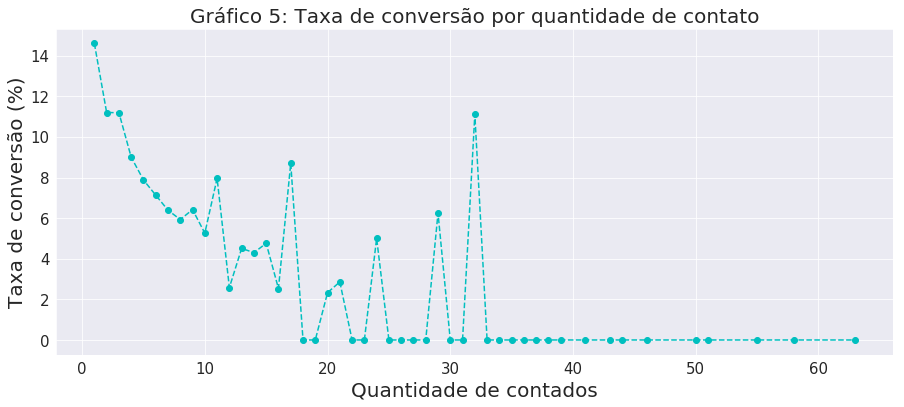

In [24]:
#--Aparência do gráfico

plt.figure(figsize=(15,6)) #Tamanho do gráfico 

plt.tick_params(axis = 'x', labelsize = 15) #Tamanho dos números do eixo y

plt.tick_params(axis = 'y', labelsize = 15) #Tamanho dos números do eixo y


#--Construindo um scatter plot

#Operados lógico
log = taxa_conversao['Num_Clientes']   >= 0

plt.plot( taxa_conversao[log].Num_Contatos, taxa_conversao[log].Taxa_Conversao, 'co--')



#--Modificando legenda dos eixos e inserindo título no gráfico
plt.xlabel('Quantidade de contados',fontsize = 20)
plt.ylabel('Taxa de conversão (%)',fontsize = 20)
plt.title('Gráfico 5: Taxa de conversão por quantidade de contato',fontsize = 20)


<hr>
<p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
    <b>Comentário:</b> Apesar de alguns pontos de oscilação, a taxa de conversão dentro dos grupos cai à medida que o número de contatos aumenta.  </p>   
    
<p style='margin: 30px 30px;'>     
    
    
<p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'> Nota-se também a presença de alguns picos existentes para quantidades maiores do que 20 ligações. Nessas faixas, a quantidade de dados por grupo é pequena. Assim, não temos dados suficientes para dizer se esses picos são ocasionados por algum mecanismo (desconhecido do conjunto de dados atual) ou são apenas efeitos aleatórios. </p>

<p style='margin: 30px 30px;'>     
    
    

<hr>

<p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<b>Resposta questão 2:</b> De uma forma geral, pode-se dizer que a  maioria dos clientes foi contatada poucas vezes. De todos os dados disponíveis, 86,5% dos clientes foram contatados menos do que 5 vezes. De todos os casos de sucesso, aproximadamente 92% deles ocorreu para clientes que receberam até 4 ligações. A taxa de conversão por quantidade de chamadas cai à medida que o número de chamadas aumenta. 
  </p>


<hr>

## <font color = 'purple'> Questão 3:</font>
<hr style = 'border: 1px solid purple;'>

<p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<b>Enunciado:</b> Baseando-se nos resultados de adesão desta campanha qual o número médio e o máximo de ligações que você indica para otimizar a adesão? </p>  



<hr>

### Estratégia de solução:

<p style='margin: 30px 30px;'> 



<p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'> 
Usar os dados obtidos no exercício anterior como base para se escolher o número médio e máximo de ligações.</p>
  
<p style='margin: 30px 30px;'> 
 

<hr>

<p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
    <b>Resposta questão 3:</b> Para otimizar a adesão, sugiro em média <b>2</b> ligações. Manter nesse patamar médio, significa operar com taxas de conversão maiores do que 10%. Além disso, evita-se o dispêndio de mão-de-obra na realização de um grande número de chamadas que, em sua grande maioria, apresentam taxa de conversão relativamente baixas. </p> 



<p style='margin: 30px 30px;'>
    
    
    
<p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'> No gráfico 4, nota-se que aproximadamente  92% dos sucessos ocorreram com os clientes que receberam até 4 ligações. Através do gráfico 5, observa-se que a taxa de conversão é baixa (em torno dos 5% ou menores )  para número de ligações maiores do que 4. Desta forma, sugiro <b>4</b> ligações como valor máximo. </p>
    


## <font color = 'purple'> Questão 4:</font>
<hr style = 'border: 1px solid purple;'>

<p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<b>Enunciado:</b> O resultado da campanha anterior tem relevância na campanha atual? </p>  

    

<hr>

### Estratégia de solução:

<p style='margin: 30px 30px;'> 



<p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'> Os clientes serão agrupados em relação ao resultado da campanha anterior. Dentro de cada grupo, será avaliada a porcentagem de sucesso na campanha atual. Essas porcentagens calculadas serão usadas para se avaliar o efeito do resultado da campanha anterior na campanha atual.</p>
  

<hr>

In [25]:
#--Coletando as categorias de resultados da campanha anterior
categoria_camp_anterior = clientes['poutcome'].drop_duplicates().tolist()


### Porcentagem de clientes para cada um dos grupos de resultados da campanha anterior 

In [26]:
porc_anterior = [round(100.0*clientes[clientes['poutcome'] == cont].shape[0]/clientes.shape[0],2) \
                 for cont in categoria_camp_anterior]

#--Construindo um DataFrame para organizar os resultados
pd.DataFrame(data= {'Categoria': categoria_camp_anterior, '% Clientes': porc_anterior}, \
             index = ['']*len(porc_anterior), columns= ['Categoria', '% Clientes']  )


,Categoria,% Clientes
,unknown,81.75
,failure,10.84
,other,4.07
,success,3.34


<hr>

<p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
  <b>Comentário:</b> Não há informações sobre a situação da campanha anterior para a maioria dos dados (85,75% dos dados estão na categoria "unknown"). Logo, esses dados serão removidos da presente análise. </p>

<hr>

### Filtrando dados que não possuam resultados na categoria 'unknown'

In [27]:
#--filtrando os dados
clientes_com_info = clientes[ clientes['poutcome'] != 'unknown']


### Porcentagem de sucesso na campanha atual para cada um dos grupos

In [28]:
#Operador lógico para filtrar dados

porc_atual = [100.0*clientes_com_info[ (clientes_com_info['poutcome'] == cont) & (clientes_com_info['y'] == 'yes')].shape[0]\
              /clientes_com_info[clientes_com_info['poutcome'] == cont].shape[0] \
              for cont in categoria_camp_anterior[1:]]

#--Construindo um DataFrame para organizar os resultados

dados_atual = pd.DataFrame(data = {'Categoria':categoria_camp_anterior[1:], '% Clientes':porc_atual}) 


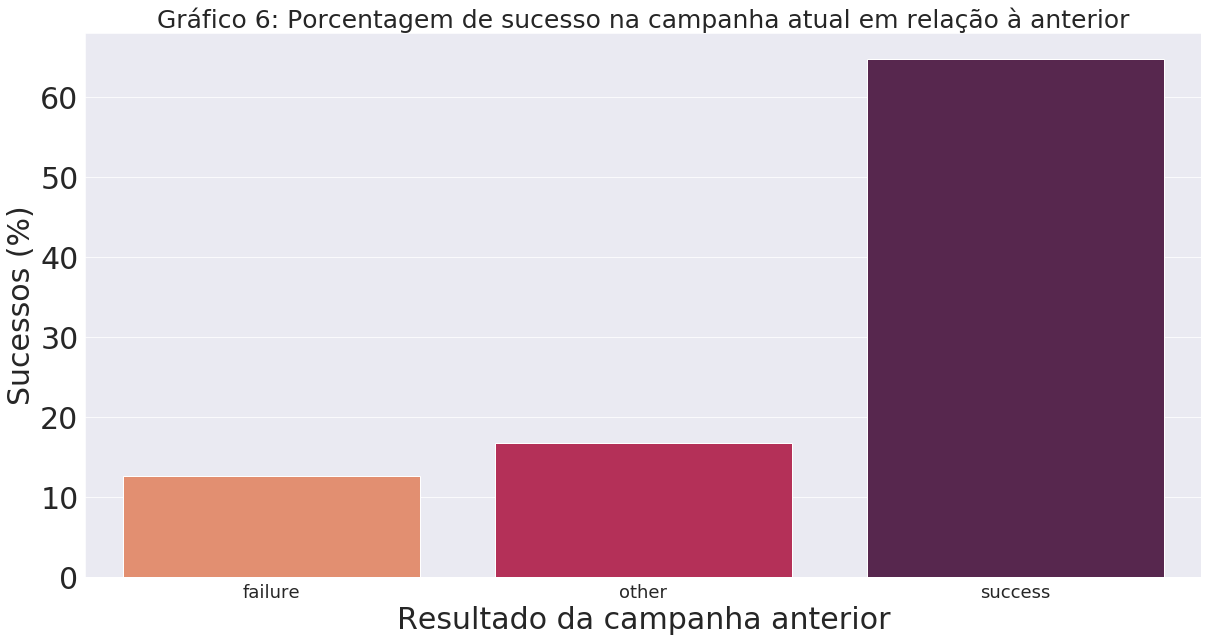

In [29]:
#--Estética do gráfico

plt.figure(figsize=(20,10)) #Tamanho do gráfico 

plt.tick_params(axis = 'x', labelsize = 18) #Tamanho dos números do eixo y

plt.tick_params(axis = 'y', labelsize = 30) #Tamanho dos números do eixo y




#--Construindo o gráfico de barras
graf_barras = sb.barplot(x='Categoria', y='% Clientes', data = dados_atual,  palette="rocket_r")


#--Modificando legenda dos eixos e inserindo título no gráfico
plt.xlabel('Resultado da campanha anterior',fontsize = 30)
plt.ylabel('Sucessos (%)',fontsize = 30)
plt.title('Gráfico 6: Porcentagem de sucesso na campanha atual em relação à anterior',fontsize = 25)

#--Definindo o estilo do gráfico

sb.set_style("darkgrid")

<hr>

<p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
    <b>Resposta questão 4:</b> Da análise do gráfico 6, observa-se que ter tido sucesso na campanha anterior faz com que o cliente tenha maior tendência a aderir a campanha atual. O contrário também é observado: os clientes onde a campanha anterior falhou aderiram com menor frequência a campanha atual. Concluindo, os dados analisados informam que os resultados da campanha anterior influênciam no sucesso da campanha atual.      </p> 


<hr>

<p style='margin: 30px 30px;'>
 

## <font color = 'purple'> Questão 5:</font>
<hr style = 'border: 1px solid purple;'>

<p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<b>Enunciado:</b> Qual o fator determinante para que o banco exija um seguro de crédito? </p>  

    

<hr>

### Estratégia de solução:

<p style='margin: 30px 30px;'> 
    
<p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<b>Suposição:</b> Estou assumindo que clientes que tenham crédido em caso de não cumprimento de pagamentos são os que o banco exijiu um seguro de crédito.</p>


<p style='margin: 50px 50px;'> 

<p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
Separar os clientes em dois grupos, usando como critério a exigência ou não de ter um seguro de crédito. Comparar esses dois grupos em todas as características do cliente presentes no banco de dados. 


<hr>

### Distribuição dos clientes em relação a exigência ou não de seguro de crédito


<p style='margin: 30px 30px;'> 

<p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
Antes de iniciar as análises, será obtido a distribuição das clientes em relação a exigência ou não de seguro de crédito por parte do banco. </p>


In [30]:
#--Definindo a lista que quardará a distribuição de clientes 
porc_clientes_seguro = []

#-Clientes na qual é exigido seguro de crédito

porc_clientes_seguro.append(round(100.0*clientes[clientes['default'] == 'yes'].shape[0]/clientes.shape[0],2))


#-Clientes na qual não é exigido seguro de crédito

porc_clientes_seguro.append(round(100.0*clientes[clientes['default'] == 'no'].shape[0]/clientes.shape[0],2))

#-Construindo um data frame para mostrar os resultados

pd.DataFrame(data = { 'Necessidade de seguro':['Sim', 'Não'], '% Clientes': porc_clientes_seguro},\
                            columns= ['Necessidade de seguro', '% Clientes'], index = ['',''])


,Necessidade de seguro,% Clientes
,Sim,1.8
,Não,98.2


<hr>

<p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
    <b>Comentário:</b> Na tabela acima, observar-se que a grande maioria dos clientes (98,2%) não possuem um seguro de crédito. </p>


<hr>

### Construindo os grupos de clientes

<hr>
<p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'> 
    <b>Comentário:</b> Os clientes serão separados em dois grupos: os sem seguro de crédito e os com seguro.</p>

<hr>


In [31]:
#-Separando o clientes
clientes_sem_seguro = clientes[clientes['default'] == 'no']

clientes_com_seguro = clientes[clientes['default'] == 'yes']

<hr>
<p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'> 
Será dado início as comparações das características dos dois grupos. </p>

<hr>


### Idade dos clientes

<hr>

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
A distribuição de idades será avaliada através de um histograma</p>

<hr>

Text(0.5,1,'Gráfico 8: Distribuição etária dos clientes com seguro de crétido')

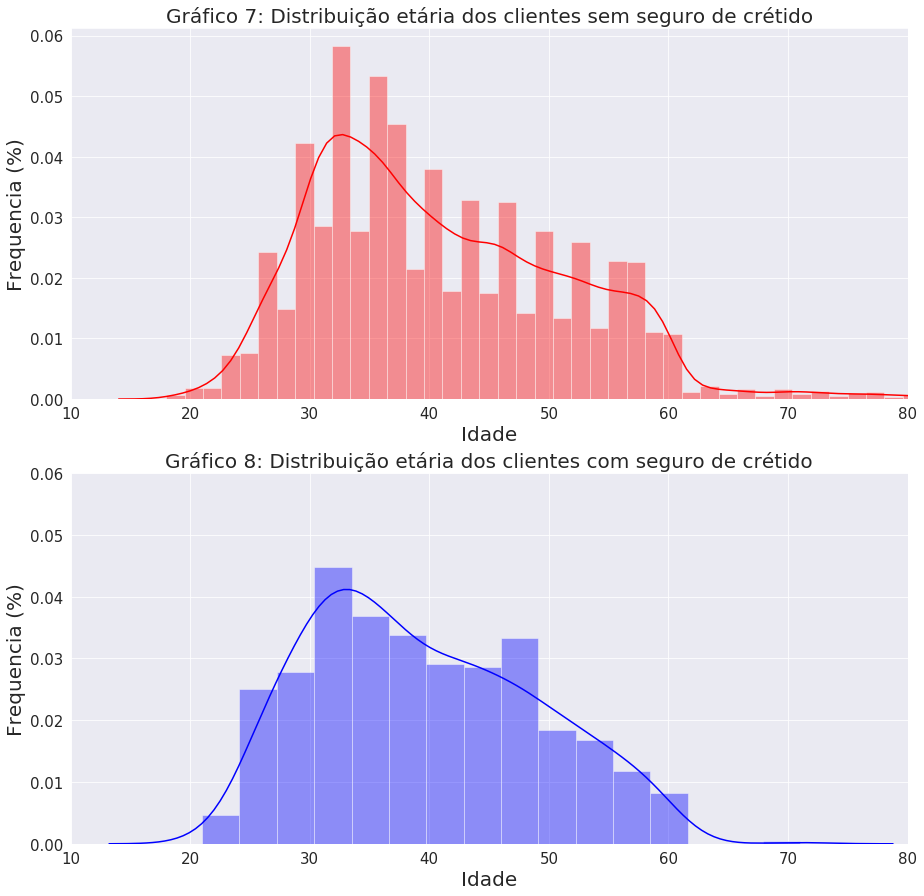

In [32]:
#--Aparência do gráfico

plt.figure(figsize=(15,15)) #Tamanho do gráfico 


#Distribuição das idades dos clientes sem seguro

plt.subplot(211)

plt.tick_params(axis = 'x', labelsize = 15) #Tamanho dos números do eixo y

plt.tick_params(axis = 'y', labelsize = 15) #Tamanho dos números do eixo y

plt.xlim((10,80))  #Defindo limites do eixo x

#--Plotando o histograma
sb.distplot(clientes_sem_seguro['age'],   kde=True, color= 'red' )


#--Modificando legenda dos eixos e inserindo título no gráfico
plt.xlabel('Idade',fontsize = 20)
plt.ylabel('Frequencia (%)',fontsize = 20)
plt.title('Gráfico 7: Distribuição etária dos clientes sem seguro de crétido',fontsize = 20)



#Distribuição das idades dos clientes com seguro

plt.subplot(212)

plt.tick_params(axis = 'x', labelsize = 15) #Tamanho dos números do eixo y

plt.tick_params(axis = 'y', labelsize = 15) #Tamanho dos números do eixo y

plt.xlim((10,80))  #Defindo limites do eixo x

plt.ylim((0.00,0.06))  #Defindo limites do eixo x


#--Plotando o histograma
sb.distplot(clientes_com_seguro['age'],   kde=True, color= 'blue' )


#--Modificando legenda dos eixos e inserindo título no gráfico
plt.xlabel('Idade',fontsize = 20)
plt.ylabel('Frequencia (%)',fontsize = 20)
plt.title('Gráfico 8: Distribuição etária dos clientes com seguro de crétido',fontsize = 20)




<hr>

<p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
    <b>Comentário: </b>  As curvas presentes nos gráficos 7 e 8 são estimativas não-paramétricas da função densidade de probabilidades. Pela forma dessas curvas, observa-se que as duas distribuições de idade são próximas. Para obter uma comparação menos qualitativa, serão geradas algumas métricas descritivas da distribuição de idade para os dois grupos de clientes. </p>


<hr>

In [33]:
#--Gerando métricas estatísticas de idade dos clientes que contraíram um empréstimo imobiliatio

pd.DataFrame(data = {'Sem seguro': round(clientes_sem_seguro.age.describe(),2), 'Com seguro': round(clientes_com_seguro.age.describe(),2)    })


,Com seguro,Sem seguro
count,815.00,44396.00
mean,39.53,40.96
std,9.36,10.64
min,21.00,18.00
25%,32.00,33.00
50%,38.00,39.00
75%,47.00,48.00
max,71.00,95.00


<hr>

<p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
    <b>Comentário:</b> Nesta tabela, podemos observar que os valores das médias e dos desvios padrão dos dois grupos são próximos. O mesmo pode ser dito dos quantis calculados. Para analisarmos essas métricas visualmente, será construído gráficos do tipo box-plot para a distribuição de idades de cada um dos grupos.
    

    
<hr>    

Text(0.5,1,'Gráfico 10: Clientes com seguro')

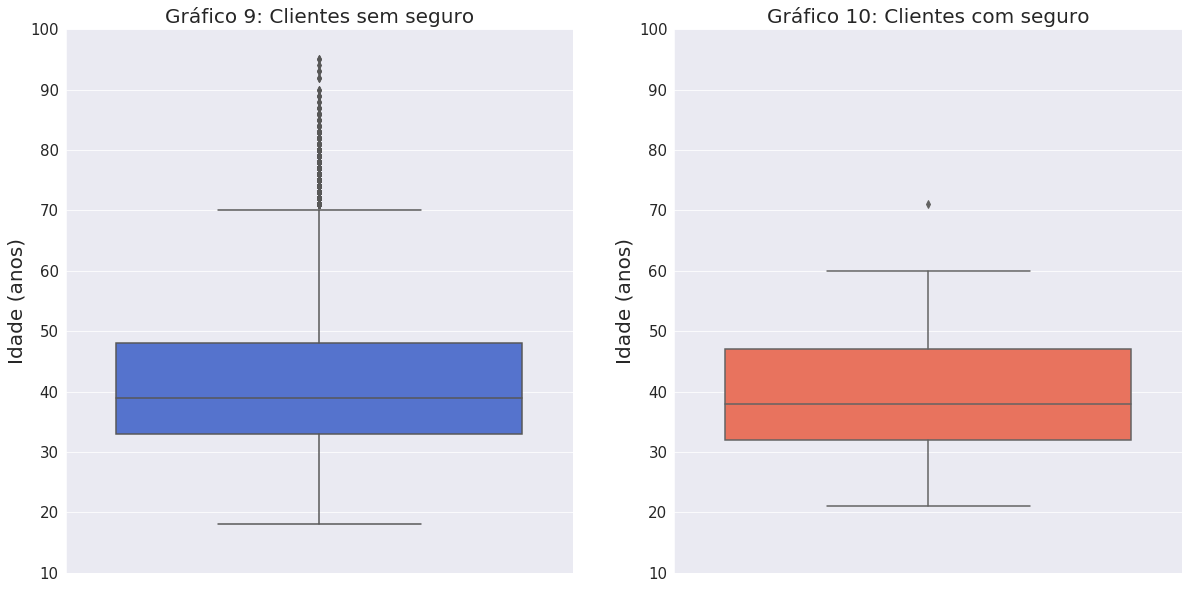

In [34]:
#--Gerando um box-plot para corroborar a interpretação

plt.figure(figsize=(20,10)) #Tamanho do gráfico 

#--Construndo os boxplot com todos os dados
plt.subplot(121)

plt.ylim((10,100))  #Defindo limites do eixo y

plt.tick_params(axis = 'y', labelsize = 15) #Tamanho dos números do eixo y

sb.boxplot(y= clientes_sem_seguro.age , color = 'royalblue')


#--Modificando legenda dos eixos e inserindo título no gráfico
plt.ylabel('Idade (anos)',fontsize = 20)
plt.title('Gráfico 9: Clientes sem seguro',fontsize = 20)


#--Construndo os boxplot com dados menores do que 2000 euros
plt.subplot(122)

plt.ylim((10,100))  #Defindo limites do eixo y

plt.tick_params(axis = 'y', labelsize = 15) #Tamanho dos números do eixo y

sb.boxplot(y= clientes_com_seguro.age, color = 'tomato')


#--Modificando legenda dos eixos e inserindo título no gráfico
plt.ylabel('Idade (anos)',fontsize = 20)
plt.title('Gráfico 10: Clientes com seguro',fontsize = 20)



<hr>

<p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
    <b>Comentário:</b> 
Os dois grupos apresentam box-plots parecidos, principalmente no que se diz respeito ao posicionamento dos quantis. Assim, a faixa etária não é a característica marcante para que o banco exija um seguro de crédito. 
</p>

<hr>

### Profissão dos clientes

In [35]:
#--Para cada grupo (com ou sem seguro), obter a fração de clientes por profissão 
proc_profi_sem_seguro = []

proc_profi_com_seguro = []

for cont in profissoes:
       
    #Calculando a fração referente a cada profissão para clientes sem seguro
    temp = 100.0*clientes_sem_seguro[clientes_sem_seguro['job'] == cont].shape[0]/clientes_sem_seguro.shape[0]
    
    proc_profi_sem_seguro.append(round(temp,2))
    
    #Calculando a fração referente a cada profissão para clientes com seguro
    temp = 100.0*clientes_com_seguro[clientes_com_seguro['job'] == cont].shape[0]/clientes_com_seguro.shape[0]
    
    proc_profi_com_seguro.append(round(temp,2))


In [36]:
#--construindo um Data Frame para organizar os resultados

#-Para clientes sem seguro
dados_profi_sem_seguro = pd.DataFrame({'Profissões': profissoes, "% Cliente": proc_profi_sem_seguro,\
                                      'tipo':['Sem seguro']*len(profissoes)},\
                                     columns= ['Profissões','% Cliente', 'tipo']\
                                     ).sort_values(by='% Cliente')


#-Para clientes com seguro
dados_profi_com_seguro = pd.DataFrame({'Profissões': profissoes, "% Cliente": proc_profi_com_seguro,\
                                      'tipo':['Com seguro']*len(profissoes)},\
                                     columns= ['Profissões','% Cliente','tipo']\
                                     ).sort_values(by='% Cliente')

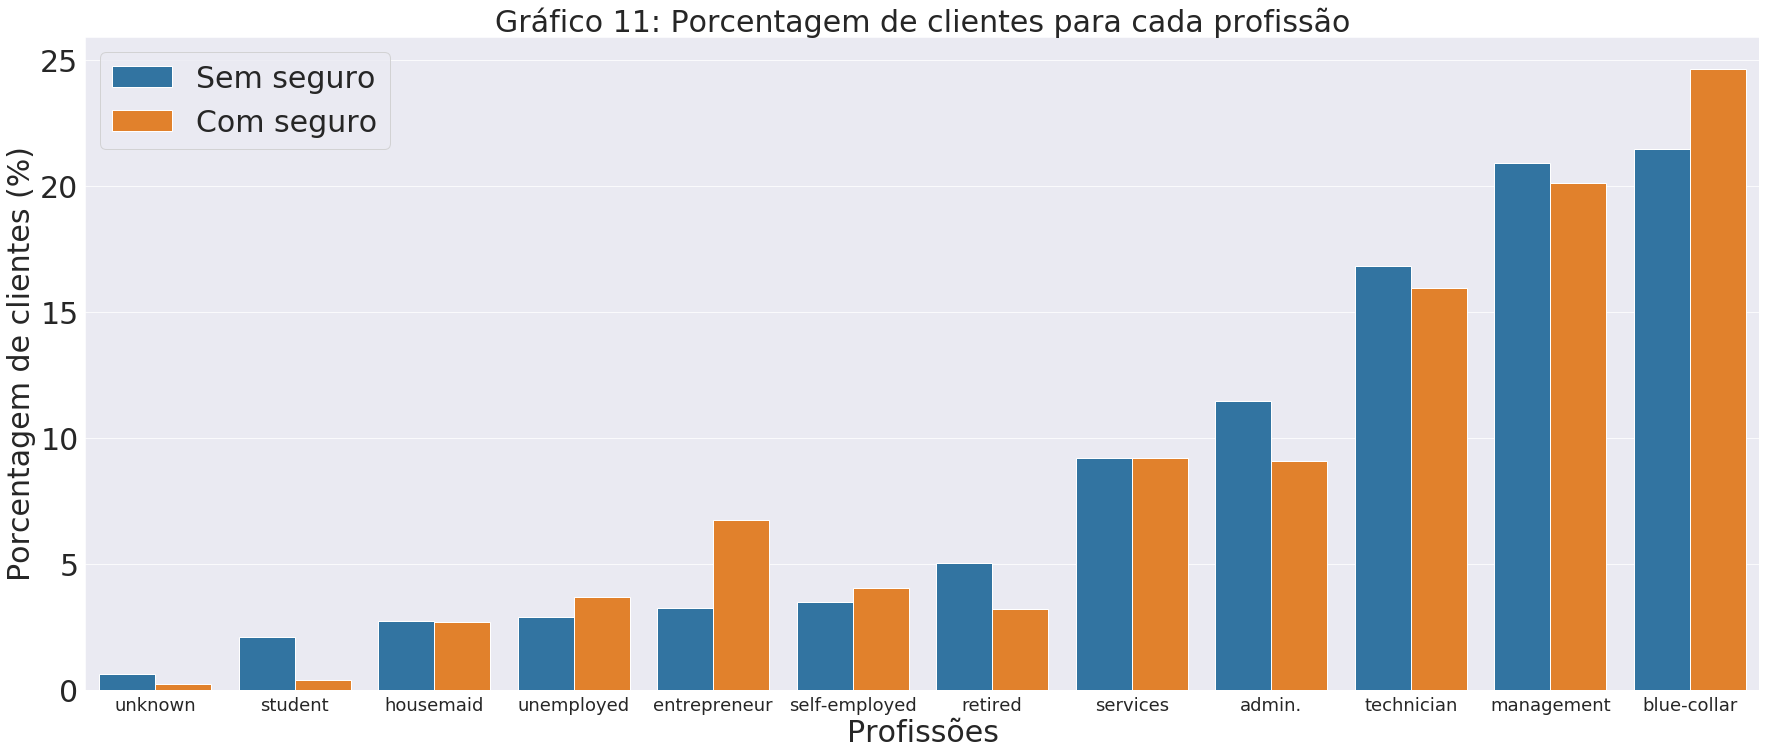

In [37]:
#--Apresentado os resultados em gráfico de barras

#-Estética do gráfico

plt.figure(figsize=(30,12)) #Tamanho do gráfico 


#Distribuição das idades dos clientes sem seguro

#plt.subplot(211)


plt.tick_params(axis = 'x', labelsize = 18) #Tamanho dos números do eixo y

plt.tick_params(axis = 'y', labelsize = 30) #Tamanho dos números do eixo y

#--Construindo o gráfico de barras
graf_barras = sb.barplot(x='Profissões', y='% Cliente',\
              data = pd.concat([dados_profi_sem_seguro,dados_profi_com_seguro]), hue = 'tipo')



#--Modificando legenda dos eixos e inserindo título no gráfico
plt.xlabel('Profissões',fontsize = 30)
plt.ylabel('Porcentagem de clientes (%)',fontsize = 30)
plt.title('Gráfico 11: Porcentagem de clientes para cada profissão',fontsize = 30)

plt.legend(fontsize=30)
#--Definindo o estilo do gráfico

sb.set_style("darkgrid")



<hr>

<p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
    <b>Comentário:</b> Ao analisar o gráfico 11, não é possivel observar diferenças marcantes entre as dois grupos. Assim, a profissão dos clientes não é um fator marcante para que o banco exija um seguro de crédito.  
</p>

<hr>

### Estado civil dos clientes

In [38]:
#--Obtendo o estado civil dos clientes
marital = clientes['marital'].drop_duplicates()

In [39]:
#--Obter a porcentagem dos clientes em cada um dos estados civis ,para cada grupo
porc_marital_sem_seguro = [] 

porc_marital_com_seguro = [] 


for cont in marital:
    
    #Calculando a fração referente a cada estado civil para clientes sem seguro
    temp = (100.0*clientes_sem_seguro[clientes_sem_seguro['marital'] == cont].shape[0]\
            )/clientes_sem_seguro.shape[0]
    
    
    porc_marital_sem_seguro.append(round(temp,2))
    
    
    #Calculando a fração referente a cada estado civil para clientes com seguro
    temp = (100.0*clientes_com_seguro[clientes_com_seguro['marital'] == cont].shape[0]\
            )/clientes_com_seguro.shape[0]
    
    
    porc_marital_com_seguro.append(round(temp,2))
    
   

In [40]:
#-Construindo dataframes para organizar os resultados

dados_marital_sem_seguro  = pd.DataFrame({'Est. civil': marital, '% Cliente': porc_marital_sem_seguro,\
                                         'tipo':['Sem Seguro']*len(marital)}).sort_values(by = '% Cliente' )


dados_marital_com_seguro  = pd.DataFrame({'Est. civil': marital, '% Cliente': porc_marital_com_seguro,\
                                         'tipo':['Com Seguro']*len(marital)} ).sort_values(by = '% Cliente' )

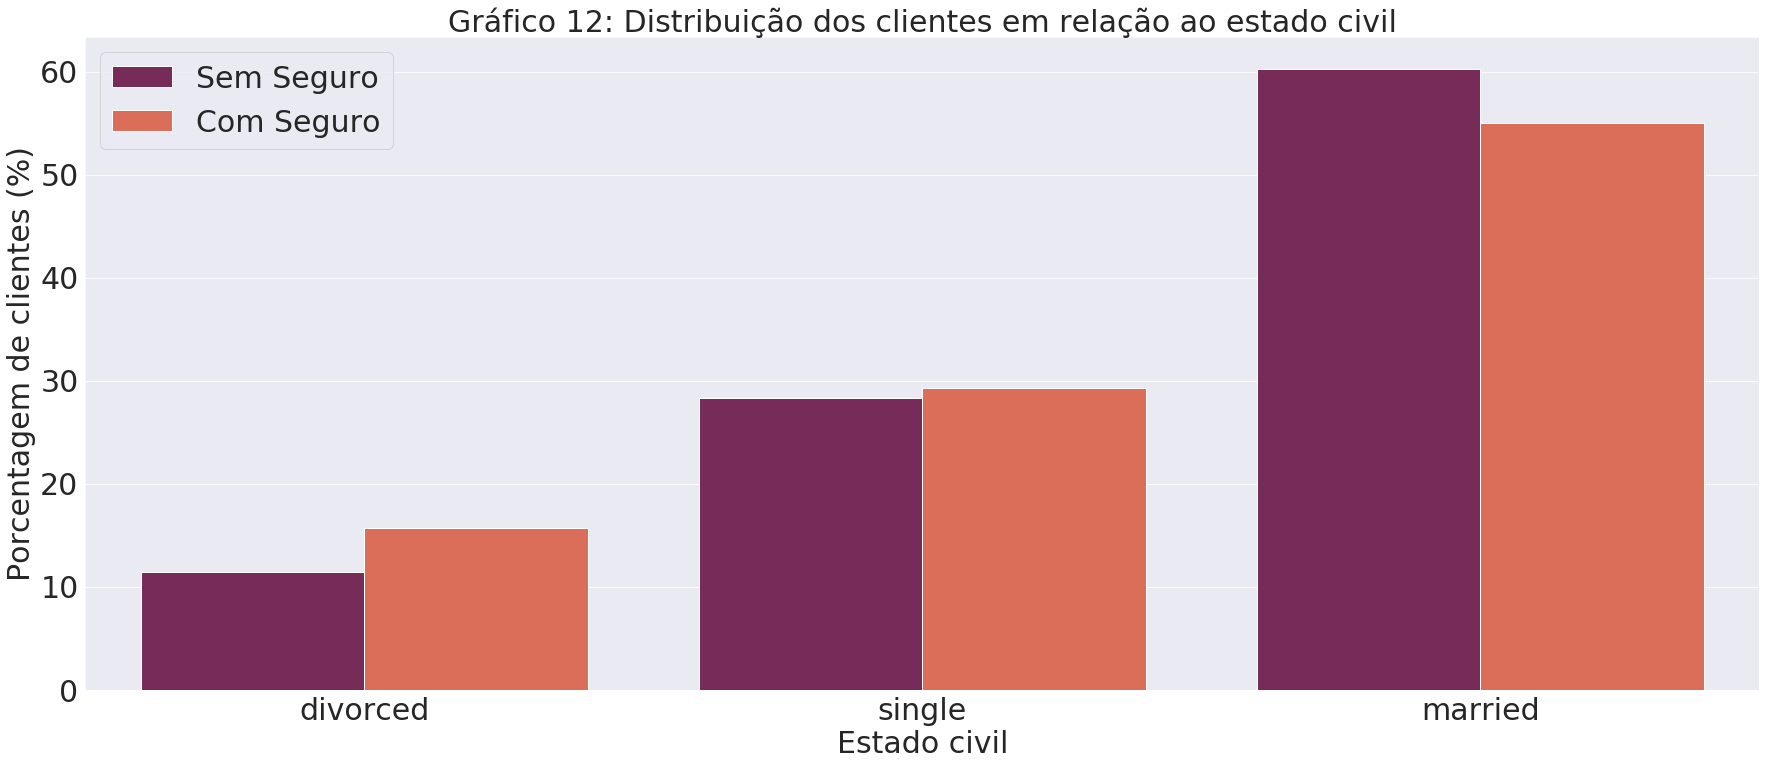

In [41]:
#--Apresentado os resultados em gráfico de barras

#-Estética do gráfico

plt.figure(figsize=(30,12)) #Tamanho do gráfico 


#Distribuição das idades dos clientes sem seguro


plt.tick_params(axis = 'x', labelsize = 30) #Tamanho dos números do eixo y

plt.tick_params(axis = 'y', labelsize = 30) #Tamanho dos números do eixo y

#--Construindo o gráfico de barras
graf_barras = sb.barplot(x='Est. civil', y='% Cliente',\
              data = pd.concat([dados_marital_sem_seguro,dados_marital_com_seguro]), hue = 'tipo',  palette="rocket")

#--Modificando legenda dos eixos e inserindo título no gráfico
plt.xlabel('Estado civil',fontsize = 30)
plt.ylabel('Porcentagem de clientes (%)',fontsize = 30)
plt.title('Gráfico 12: Distribuição dos clientes em relação ao estado civil',fontsize = 30)

plt.legend(fontsize=30)
#--Definindo o estilo do gráfico

sb.set_style("darkgrid")


<hr>

<p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
    <b>Comentário:</b> Em relação ao estado civil, os dois grupos apresentam a mesma tendência. Assim, o estado civil dos clientes não é um fator marcante para que o banco exija um seguro de crédito.  
</p>

<hr>

### Escolaridade dos clientes

In [42]:
#--Obtendo a escolaridade dos clientes com empréstimo imobiliário
escolaridade = clientes['education'].drop_duplicates()

In [43]:
#--Obter a porcentagem dos clientes em cada umas da classes de escolaridade, com e sem seguro
porc_escol_sem_seguro = []

porc_escol_com_seguro = []


for cont in escolaridade:
    
    #Obtendo porcentagem dos clientes para cada modalidade de escolaridade, sem seguro
    temp = 100.0*clientes_sem_seguro[clientes_sem_seguro['education'] == cont].shape[0]/clientes_sem_seguro.shape[0]
    
    porc_escol_sem_seguro.append(round(temp,2))

    
    #Obtendo porcentagem dos clientes para cada modalidade de escolaridade, sem seguro
    temp = 100.0*clientes_com_seguro[clientes_com_seguro['education'] == cont].shape[0]/clientes_com_seguro.shape[0]
    
    porc_escol_com_seguro.append(round(temp,2))


In [44]:
#-Construindo dataframes para organizar os resultados

dados_escol_sem_seguro  = pd.DataFrame({'Escolaridade': escolaridade, '% Cliente': porc_escol_sem_seguro,\
                                         'tipo':['Sem Seguro']*len(escolaridade)}).sort_values(by = '% Cliente')


dados_escol_com_seguro  = pd.DataFrame({'Escolaridade': escolaridade, '% Cliente': porc_escol_com_seguro,\
                                         'tipo':['Com Seguro']*len(escolaridade)} ).sort_values(by = '% Cliente' )



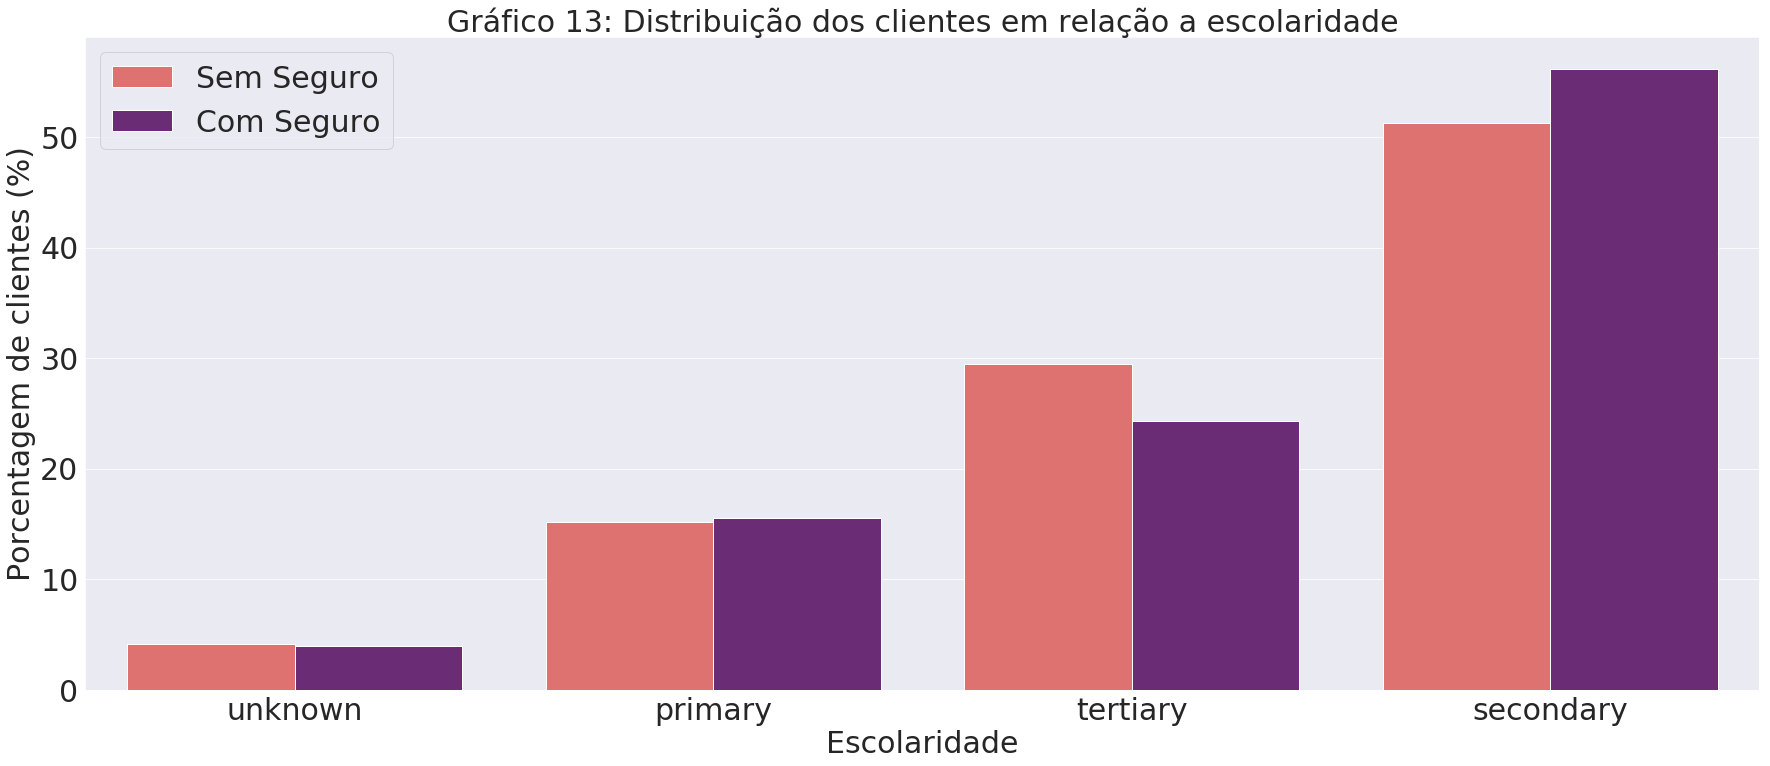

In [45]:
#--Apresentado os resultados em gráfico de barras

#-Estética do gráfico

plt.figure(figsize=(30,12)) #Tamanho do gráfico 


#Distribuição das idades dos clientes sem seguro


plt.tick_params(axis = 'x', labelsize = 30) #Tamanho dos números do eixo y

plt.tick_params(axis = 'y', labelsize = 30) #Tamanho dos números do eixo y

#--Construindo o gráfico de barras
graf_barras = sb.barplot(x='Escolaridade', y='% Cliente',\
              data = pd.concat([dados_escol_sem_seguro,dados_escol_com_seguro]), hue = 'tipo',  palette="magma_r")

#--Modificando legenda dos eixos e inserindo título no gráfico
plt.xlabel('Escolaridade',fontsize = 30)
plt.ylabel('Porcentagem de clientes (%)',fontsize = 30)
plt.title('Gráfico 13: Distribuição dos clientes em relação a escolaridade',fontsize = 30)

plt.legend(fontsize=30)
#--Definindo o estilo do gráfico

sb.set_style("darkgrid")


<hr>

<p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
    <b>Comentário:</b> Os clientes apresentam a mesma tendência de distribuição de escolaridade nos dois grupos. Logo, a escolaridade não é um fator marcante para que o banco exija um seguro de crédito.
</p>

<hr>

###  Saldo médio anual dos clientes

<hr>

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
Os clientes serão divididos em três categorias em relação a situação do saldo médio anual:</p>


<ul>
 
<li> <p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'><b>Positivo:</b> Clientes que possuem saldo anual médio positivo;</li>

<li> <p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'><b>Negativo:</b> Clientes que possuem saldo anual médio negativo;</li>

<li> <p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'><b>Inalterado:</b> Clientes na qual o saldo permaneceu inalterado.</li>







<hr>

In [46]:
#--Obter a porcentagem de clientes possuem saldo anual positivo, negativo e inalterado --> sem seguro
porc_saldo_sem_seguro = []

#--Sobre os clientes com saldo positivo
porc_saldo_sem_seguro.append(round(100.0*clientes_sem_seguro[clientes_sem_seguro['balance'] > 0].shape[0]/clientes_sem_seguro.shape[0],2))

#--Sobre os clientes com saldo negativo
porc_saldo_sem_seguro.append(round(100.0*clientes_sem_seguro[clientes_sem_seguro['balance'] < 0].shape[0]/clientes_sem_seguro.shape[0],2))

#--Sobre os clientes com saldo Inalterado
porc_saldo_sem_seguro.append(round(100.0*clientes_sem_seguro[clientes_sem_seguro['balance'] == 0].shape[0]/clientes_sem_seguro.shape[0],2))


In [47]:
#--Obter a porcentagem de clientes possuem saldo anual positivo, negativo e inalterado --> com seguro
porc_saldo_com_seguro = []

#--Sobre os clientes com saldo positivo
porc_saldo_com_seguro.append(round(100.0*clientes_com_seguro[clientes_com_seguro['balance'] > 0].shape[0]/clientes_com_seguro.shape[0],2))

#--Sobre os clientes com saldo negativo
porc_saldo_com_seguro.append(round(100.0*clientes_com_seguro[clientes_com_seguro['balance'] < 0].shape[0]/clientes_com_seguro.shape[0],2))

#--Sobre os clientes com saldo Inalterado
porc_saldo_com_seguro.append(round(100.0*clientes_com_seguro[clientes_com_seguro['balance'] == 0].shape[0]/clientes_com_seguro.shape[0],2))


In [48]:
#-Construindo dataframes para organizar os resultados

dados_saldo_sem_seguro  = pd.DataFrame({'Situação saldo': ['Positivo', 'Negativo','Inalterado'] , \
                                         '% Cliente': porc_saldo_sem_seguro,\
                                         'tipo':['Sem Seguro']*3}).sort_values(by = '% Cliente')


dados_saldo_com_seguro  =pd.DataFrame({'Situação saldo': ['Positivo', 'Negativo','Inalterado'] , \
                                         '% Cliente': porc_saldo_com_seguro,\
                                         'tipo':['Com Seguro']*3}).sort_values(by = '% Cliente')


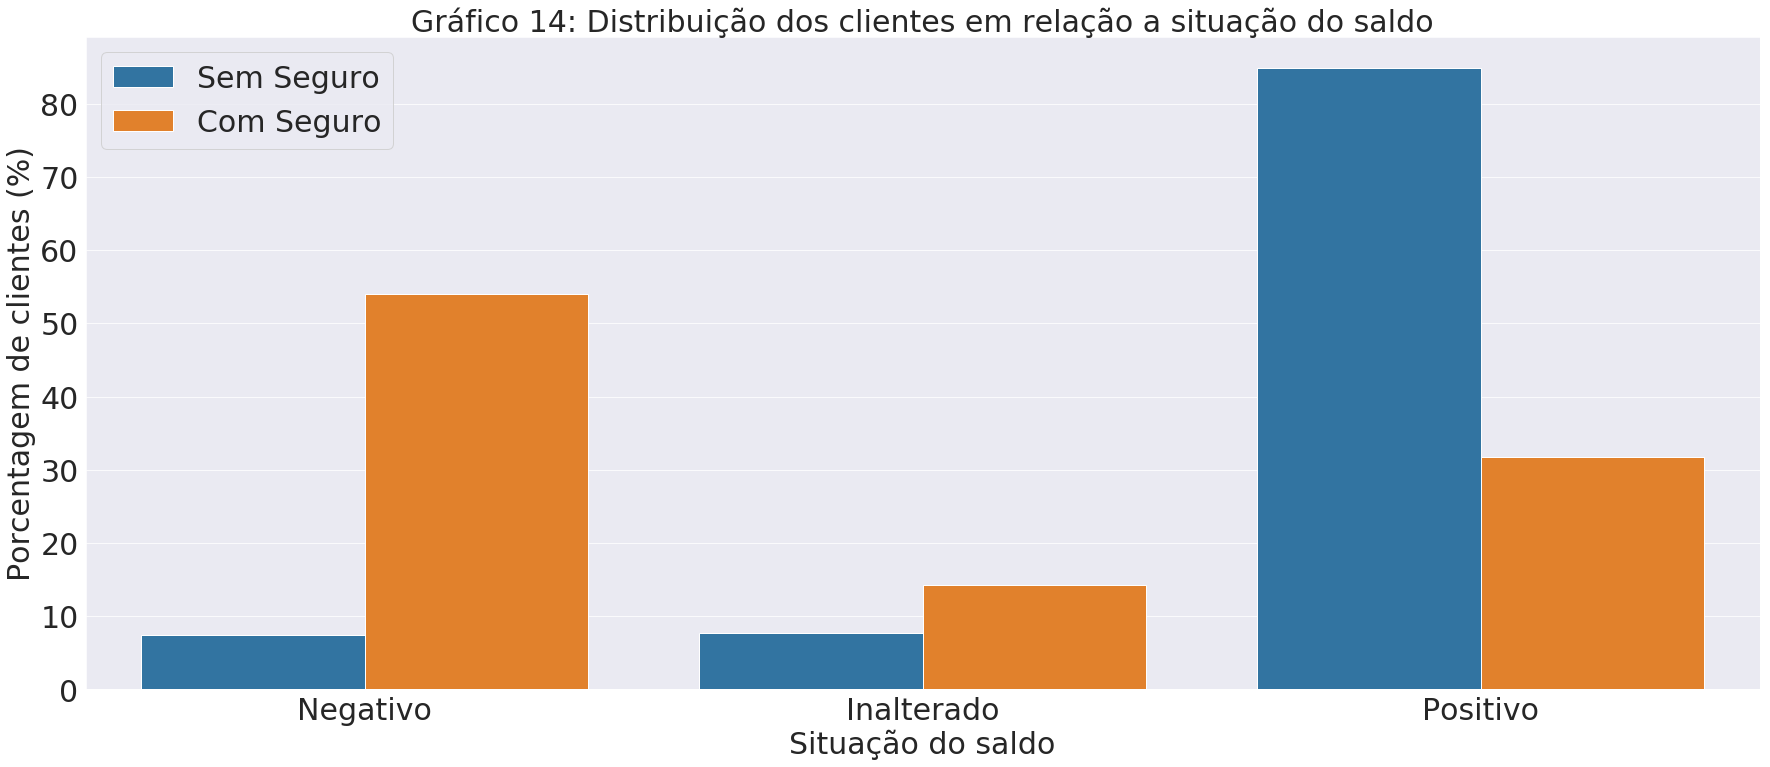

In [49]:
#--Apresentado os resultados em gráfico de barras

#-Estética do gráfico

plt.figure(figsize=(30,12)) #Tamanho do gráfico 


#Distribuição das idades dos clientes sem seguro


plt.tick_params(axis = 'x', labelsize = 30) #Tamanho dos números do eixo y

plt.tick_params(axis = 'y', labelsize = 30) #Tamanho dos números do eixo y

#--Construindo o gráfico de barras
graf_barras = sb.barplot(x='Situação saldo', y='% Cliente',\
              data = pd.concat([dados_saldo_sem_seguro,dados_saldo_com_seguro]), hue = 'tipo')

#--Modificando legenda dos eixos e inserindo título no gráfico
plt.xlabel('Situação do saldo',fontsize = 30)
plt.ylabel('Porcentagem de clientes (%)',fontsize = 30)
plt.title('Gráfico 14: Distribuição dos clientes em relação a situação do saldo',fontsize = 30)

plt.legend(fontsize=30)
#--Definindo o estilo do gráfico

sb.set_style("darkgrid")


<hr>

<p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
    <b>Comentário:</b> Os clientes com seguro de crédito possuem uma maior tendência a terem saldos anuais negativos. O contrário é observado nos clientes que não possuem seguro de crédito, onde há uma maior tendência de terem saldos anuais positivos. Assim, ter saldo anual negativo é um fator determinante para que o banco exija seguro de crédito.</p>

<hr>

### Realização de empréstimos

<hr>

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
Novamente, os clientes serão dividios em 4 categorias:</p>

<ul>
 
<li> <p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'><b>Housing:</b> Clientes que contraíram apenas empréstimo imobiliários; </li>
   
<li> <p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'><b>Loan:</b> Clientes que contraíram apenas empréstimo pessoal; </li> 

<li> <p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'><b>Ambos:</b> Clientes que contraíram empréstimos imobiliário e pessoal; </li>   

<li> <p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'><b>Nenhum:</b> Clientes que não contraíram empréstimos. </li>   
 
</Ul>    



<hr>

In [50]:
#--Obter a porcentagem de clientes possuem saldo anual positivo, negativo e inalterado --> sem seguro
porc_empre_sem_seguro = []

porc_empre_com_seguro = []


#--Porcentagem de clientes nas 4 categorias, com e sem seguro

for cont in nome_categorias:

    
    if cont != 'Nenhum':
        
        if cont == 'Housing':
            
            #Operação lógica dentro clientes sem seguro da catergoria Housing
            log_1 = (clientes_sem_seguro['housing']  == 'yes') & (clientes_sem_seguro['loan']  == 'no') 
            
            #Operação lógica dentro clientes com seguro da catergoria Housing
            log_2 = (clientes_com_seguro['housing']  == 'yes') & (clientes_com_seguro['loan']  == 'no') 
            
            
        elif cont == 'Loan':
            
            #Operação lógica dentro clientes sem seguro da catergoria Loan
            log_1 = (clientes_sem_seguro['housing']  == 'no') & (clientes_sem_seguro['loan']  == 'yes')
            
            
            #Operação lógica dentro clientes com seguro da catergoria Loan
            log_2 = (clientes_com_seguro['housing']  == 'no') & (clientes_com_seguro['loan']  == 'yes') 
            
        else:
            
            #Operação lógica dentro clientes sen seguro da catergoria Ambos
            log_1 = (clientes_sem_seguro['housing']  == 'yes') & (clientes_sem_seguro['loan']  == 'yes')
    
    
            #Operação lógica dentro clientes com seguro da catergoria Ambos
            log_2 = (clientes_com_seguro['housing']  == 'yes') & (clientes_com_seguro['loan']  == 'yes')

        
        
        #Obtendo porcentagem para cada uma das categorias, com e sem seguro
        porc_empre_sem_seguro.append(round(100.0*clientes_sem_seguro[log_1].shape[0]/clientes_sem_seguro.shape[0],2))
        
        #Obtendo porcentagem para cada uma das categorias, com e sem seguro
        porc_empre_com_seguro.append(round(100.0*clientes_com_seguro[log_2].shape[0]/clientes_com_seguro.shape[0],2))
        
   
        
    else:
        
        
        
        #--Porcentagem de clientes na categoria "Nenhum", sem seguro
        porc_empre_sem_seguro.append(100.0 - sum(porc_empre_sem_seguro))
        
        #--Porcentagem de clientes na categoria "Nenhum", sem seguro
        porc_empre_com_seguro.append(100.0 - sum(porc_empre_com_seguro))



In [51]:
#-Construindo dataframes para organizar os resultados

dados_empre_sem_seguro  = pd.DataFrame({'Categoria': nome_categorias , \
                                         '% Cliente': porc_empre_sem_seguro,\
                                         'tipo':['Sem Seguro']*4}).sort_values(by = '% Cliente')


dados_empre_com_seguro  =pd.DataFrame({'Categoria': nome_categorias , \
                                         '% Cliente': porc_empre_com_seguro,\
                                         'tipo':['Com Seguro']*4}).sort_values(by = '% Cliente')

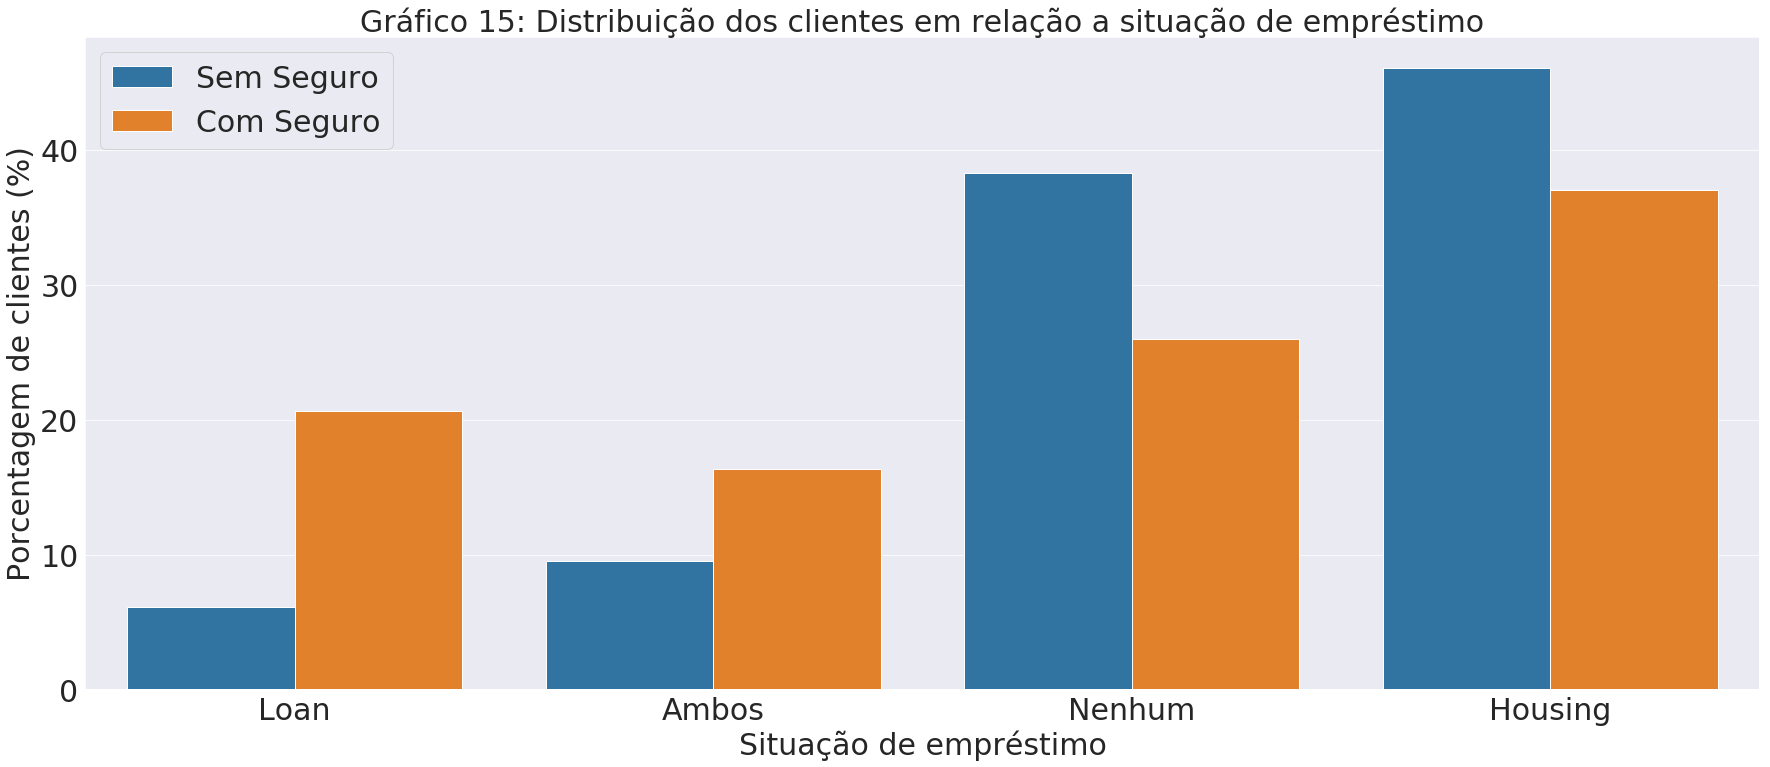

In [52]:
#--Apresentado os resultados em gráfico de barras

#-Estética do gráfico

plt.figure(figsize=(30,12)) #Tamanho do gráfico 


#Distribuição das idades dos clientes sem seguro


plt.tick_params(axis = 'x', labelsize = 30) #Tamanho dos números do eixo y

plt.tick_params(axis = 'y', labelsize = 30) #Tamanho dos números do eixo y

#--Construindo o gráfico de barras
graf_barras = sb.barplot(x='Categoria', y='% Cliente',\
              data = pd.concat([dados_empre_sem_seguro,dados_empre_com_seguro]), hue = 'tipo')

#--Modificando legenda dos eixos e inserindo título no gráfico
plt.xlabel('Situação de empréstimo',fontsize = 30)
plt.ylabel('Porcentagem de clientes (%)',fontsize = 30)
plt.title('Gráfico 15: Distribuição dos clientes em relação a situação de empréstimo',fontsize = 30)

plt.legend(fontsize=30)
#--Definindo o estilo do gráfico

sb.set_style("darkgrid")


<hr>

<p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
    <b>Comentário:</b> Os dois grupos não apresentam diferenças marcantes no que diz respeito ao comportamento em relação a empréstimos.  Assim, essa característica não é um fator marcante para que o banco exija um seguro de crédito.  </p>

<hr>

<hr>

<p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
    <b>Resposta questão 5:</b> Das análises realizadas, pode-se observar que o saldo médio anual dos clientes é o fator determinante para que o banco exija um seguro de crédito. </p> 


<hr>

<p style='margin: 30px 30px;'>
 

## <font color = 'purple'> Questão 6:</font>
<hr style = 'border: 1px solid purple;'>

<p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<b>Enunciado:</b> Quais são as características mais proeminentes de um cliente que possua empréstimo imobiliário? </p>  




<hr>

### Estratégia de solução:

<p style='margin: 30px 30px;'> 
    

<p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'> 
Filtrar os cliente que possuam empréstimo imobiliário e analisar suas características mais marcantes.     
    

<hr>

### Filtrando os clientes que possuam empréstimo imobiliário

In [53]:
clientes_imobiliario = clientes[clientes['housing'] == 'yes']

### Distribuição de idade dos clientes que contraíram um empréstimo imobiliário 

<hr>

<p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
A distribuição de idades será avaliada através de um histograma</p>

<hr>

Text(0.5,1,'Gráfico 16: Distribuição etária dos clientes com seguro imobiliário')

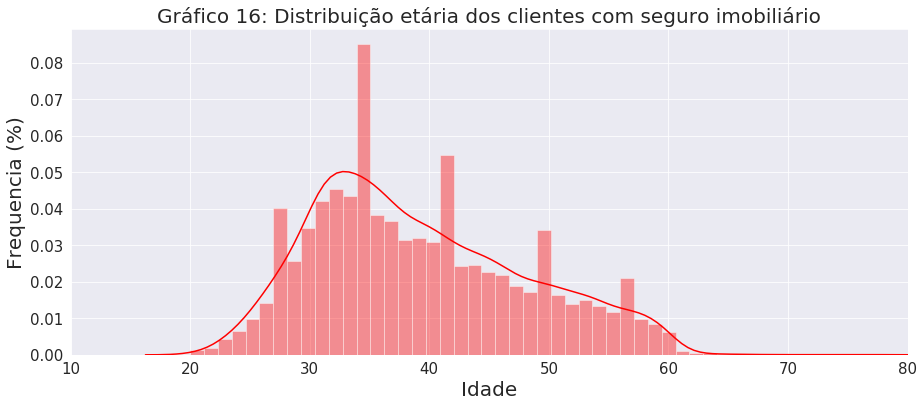

In [54]:
#--Aparência do gráfico

plt.figure(figsize=(15,6)) #Tamanho do gráfico 

plt.tick_params(axis = 'x', labelsize = 15) #Tamanho dos números do eixo y

plt.tick_params(axis = 'y', labelsize = 15) #Tamanho dos números do eixo y

plt.xlim((10,80))  #Defindo limites do eixo x

#--Plotando o histograma
sb.distplot(clientes_imobiliario['age'],   kde=True, color= 'red' )


#--Modificando legenda dos eixos e inserindo título no gráfico
plt.xlabel('Idade',fontsize = 20)
plt.ylabel('Frequencia (%)',fontsize = 20)
plt.title('Gráfico 16: Distribuição etária dos clientes com seguro imobiliário',fontsize = 20)

<hr>

<p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
    <b>Comentário:</b>  Pela estimativa da função densidade de probabilidades (curva contínua em vermelho), podemos observar que há uma maior "concentração" de pessoas entre 30 e 40 anos. Para podermos descrever essa distribuição quantitativamente, serão geradas algumas métricas descritivas.

<hr>

In [55]:
#--Gerando métricas estatísticas de idade dos clientes que contraíram um empréstimo imobiliatio

pd.DataFrame(data= {'Métricas':round(clientes_imobiliario['age'].describe(),2)})


,Métricas
count,25130.00
mean,39.18
std,8.93
min,20.00
25%,32.00
50%,38.00
75%,45.00
max,78.00


<hr>

<p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
    <b>Comentário:</b> Através desta tabela podemos observar que os clientes possuem uma média de idade de 39 anos e um desvio padrão de +/- 9 anos.   Em relação aos quantils, a análise será feita através de um grafico do tipo box-plot. </p>

<hr>

Text(0.5,1,'Gráfico 17: Clientes com empréstimo imobiliário')

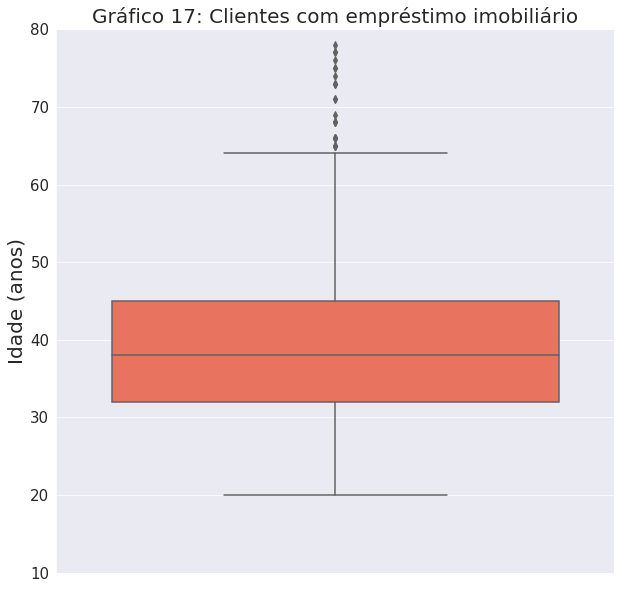

In [56]:
plt.figure(figsize=(10,10)) #Tamanho do gráfico 

#--Construndo os boxplot com todos os dados

plt.tick_params(axis = 'y', labelsize = 15) #Tamanho dos números do eixo y

sb.boxplot(y=  clientes_imobiliario['age'], color = 'tomato')

plt.ylim((10,80)) #Definindo limites do eixos y

#--Modificando legenda dos eixos e inserindo título no gráfico
plt.ylabel('Idade (anos)',fontsize = 20)
plt.title('Gráfico 17: Clientes com empréstimo imobiliário',fontsize = 20)


<hr>

<p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
    <b>Comentário:</b> Através do gráfico 17, podemos observar que 50% dos clientes com empréstimo imobiliário tem idade entre 32 e 45 anos. Assim, os clientes com empréstimo imobiliário, em sua maioria, estão na faixa dos 32 aos 45 anos, sendo que a mediana é 38 anos.   </p>

<hr>

### Perfil profissional dos clientes que possuem empréstimo imobiliário

In [57]:
#--Obtendo as profissões dos clientes que possuem empréstimo imobiliário  

profissoes_imobiliario = clientes_imobiliario['job'].drop_duplicates()

In [58]:
#--Do total de empréstimos imobiliários obter o porcentagem referente a cada profissão

proc_I_profi = []

for cont in profissoes_imobiliario:
    
    #Calculando a fração referente a cada profissão 
    temp = (100.0*clientes_imobiliario[clientes_imobiliario['job'] == cont].shape[0])/clientes_imobiliario.shape[0]
        
    
    proc_I_profi.append(temp)


In [59]:
#--Contruindo um dataframe para organizar os resultados

prof_clientes = pd.DataFrame({'Profissao': profissoes_imobiliario, '%_clientes': proc_I_profi },\
                          columns = ['Profissao','%_clientes']  ).sort_values(by='%_clientes')


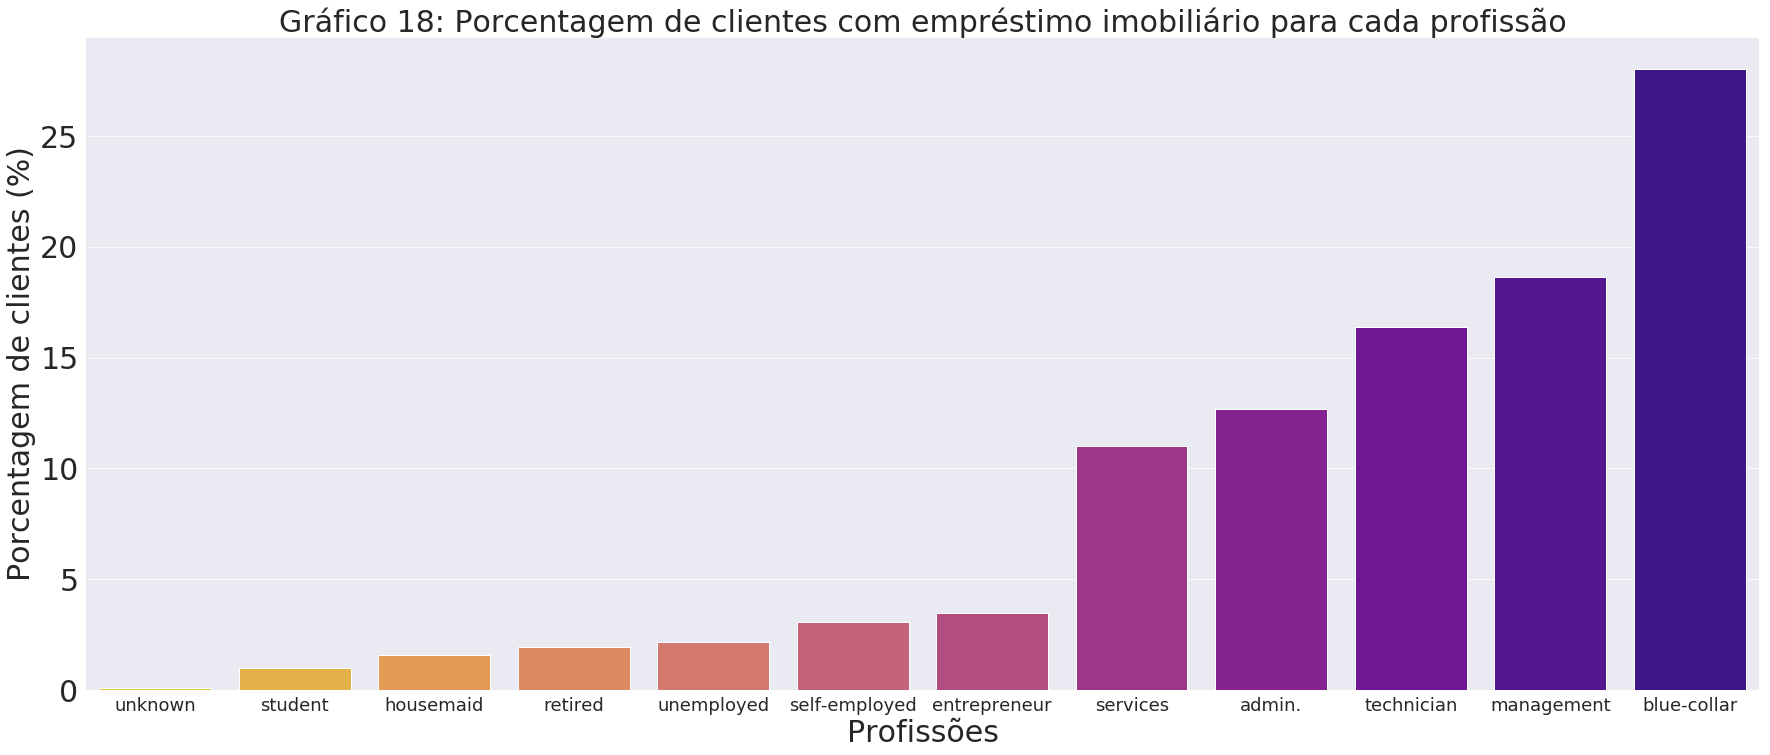

In [60]:
#--Apresentado os resultados num gráfico de barras

#-Estética do gráfico

plt.figure(figsize=(30,12)) #Tamanho do gráfico 

plt.tick_params(axis = 'x', labelsize = 18) #Tamanho dos números do eixo y

plt.tick_params(axis = 'y', labelsize = 30) #Tamanho dos números do eixo y

#--Construindo o gráfico de barras
graf_barras = sb.barplot(x='Profissao', y='%_clientes', data = prof_clientes,  palette="plasma_r")


#--Modificando legenda dos eixos e inserindo título no gráfico
plt.xlabel('Profissões',fontsize = 30)
plt.ylabel('Porcentagem de clientes (%)',fontsize = 30)
plt.title('Gráfico 18: Porcentagem de clientes com empréstimo imobiliário para cada profissão',fontsize = 30)

#--Definindo o estilo do gráfico

sb.set_style("darkgrid")

<hr>

<p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
    <b>Comentário:</b> Através do gráfico 18, nota-se que a profissão "blue-collar" é a que possui o maior número de clientes com empréstimo imobiliário.</p>

<hr>

### Estado civil dos clientes com empréstimo imobiliário

In [61]:
#--Obtendo o estado civil dos clientes
marital = clientes_imobiliario['marital'].drop_duplicates()

In [62]:
#--Obter a porcentagem dos clientes em cada um dos estados civis
porc_tipo_marital = [] 


for cont in marital:
    
    #Computando a fração
    temp = (100.0*clientes_imobiliario[clientes_imobiliario['marital'] == cont].shape[0])/clientes_imobiliario.shape[0]
    
    
    porc_tipo_marital.append(round(temp,2))


In [63]:
#--Construindo um Data frame para organizar os dados

dados_marital = pd.DataFrame(data = {'Est. civil': marital, '% Clientes': porc_tipo_marital},\
                            columns= ['Est. civil', '% Clientes']).sort_values(by='% Clientes')

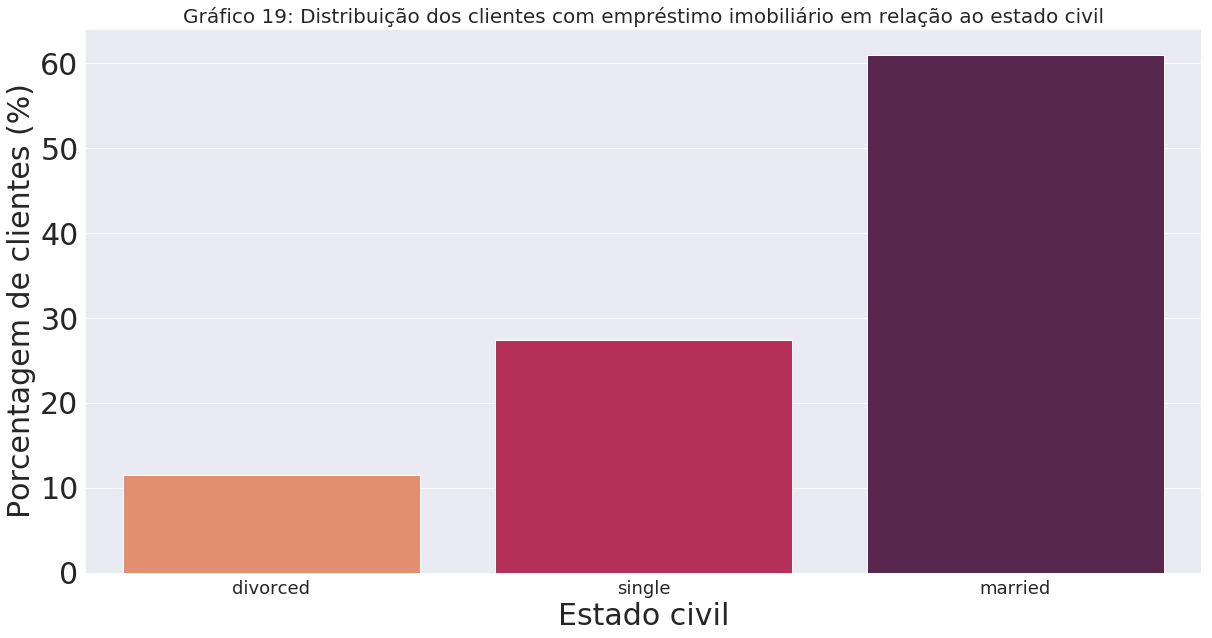

In [64]:
#--Estética do gráfico

plt.figure(figsize=(20,10)) #Tamanho do gráfico 

plt.tick_params(axis = 'x', labelsize = 18) #Tamanho dos números do eixo y

plt.tick_params(axis = 'y', labelsize = 30) #Tamanho dos números do eixo y




#--Construindo o gráfico de barras
graf_barras = sb.barplot(x='Est. civil', y='% Clientes', data = dados_marital,  palette="rocket_r")


#--Modificando legenda dos eixos e inserindo título no gráfico
plt.xlabel('Estado civil',fontsize = 30)
plt.ylabel('Porcentagem de clientes (%)',fontsize = 30)
plt.title('Gráfico 19: Distribuição dos clientes com empréstimo imobiliário em relação ao estado civil',fontsize = 20)

#--Definindo o estilo do gráfico

sb.set_style("darkgrid")

<hr>

<p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
    <b>Comentário:</b> Através do gráfico 19, abserva-se que a maioria dos clientes é casado.</p>
<hr>

### Escolaridade dos clientes que fizeram um empréstimo imobiliário

In [65]:
#--Obtendo a escolaridade dos clientes com empréstimo imobiliário
escolaridade = clientes_imobiliario['education'].drop_duplicates()

In [66]:
#--Obter a porcentagem dos clientes em cada um dos estados civis
porc_tipo_escolaridade = []


for cont in escolaridade:
    
    #Obtendo porcentagem dos clientes para cada modalidade de escolaridade
    temp = 100.0*clientes_imobiliario[clientes_imobiliario['education'] == cont].shape[0]/clientes_imobiliario.shape[0]
    
    porc_tipo_escolaridade.append( round(temp,2))
        

In [67]:
#--Construindo um data frame para organizar os dados
dados_escolaridade = pd.DataFrame(data = {'Escolaridade': escolaridade, '% Clientes': porc_tipo_escolaridade},\
                                  columns=['Escolaridade', '% Clientes']).sort_values(by='% Clientes')


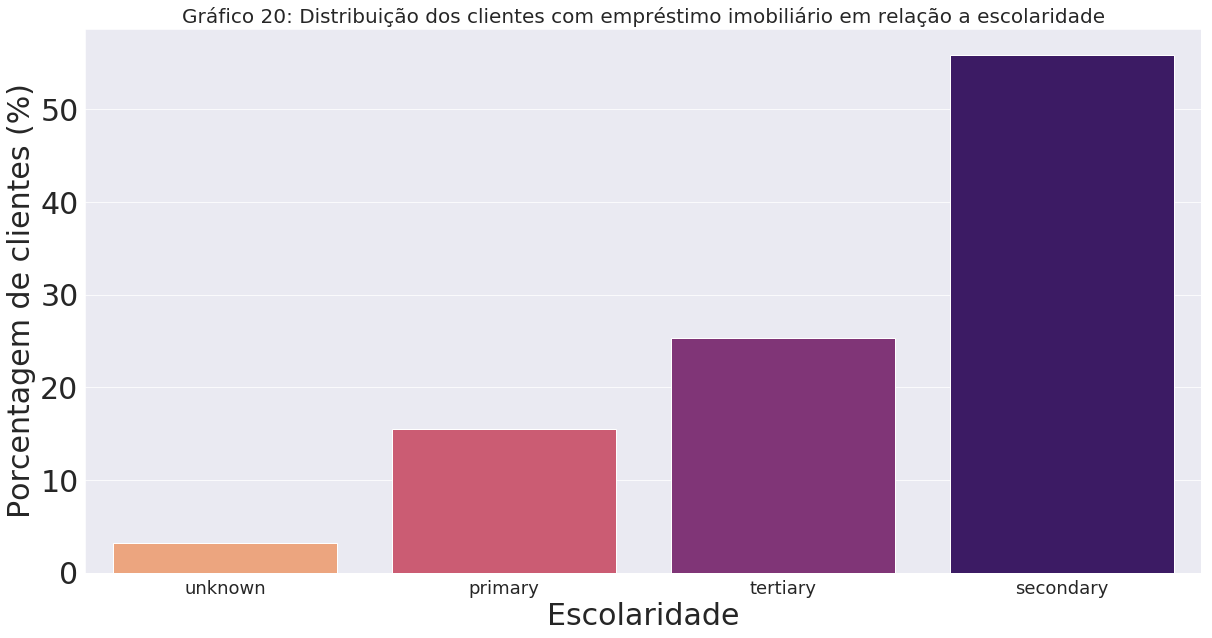

In [68]:
#--Estética do gráfico

plt.figure(figsize=(20,10)) #Tamanho do gráfico 

plt.tick_params(axis = 'x', labelsize = 18) #Tamanho dos números do eixo y

plt.tick_params(axis = 'y', labelsize = 30) #Tamanho dos números do eixo y

#plt.ylim((0,100)) #Definindo limites do eixos y


#--Construindo o gráfico de barras
graf_barras = sb.barplot(x='Escolaridade', y='% Clientes', data = dados_escolaridade ,  palette="magma_r")


#--Modificando legenda dos eixos e inserindo título no gráfico
plt.xlabel('Escolaridade',fontsize = 30)
plt.ylabel('Porcentagem de clientes (%)',fontsize = 30)
plt.title('Gráfico 20: Distribuição dos clientes com empréstimo imobiliário em relação a escolaridade',fontsize = 20)

#--Definindo o estilo do gráfico

sb.set_style("darkgrid")

<hr>

<p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
    <b>Comentário:</b> Através do gráfico 20, abserva-se que a maioria dos clientes com empréstimo imobiliário possui como escolaridade o nível secundário.</p>
<hr>

### A presença de seguro de crédito 

In [69]:
#--Obtendo a lista com a condição do crédito pré-aprovado
seguro  = clientes_imobiliario['default'].drop_duplicates()


In [70]:
#--obter a porcentagem de clientes em cada uma das condições de crédito pré-aprovado
porc_mod_seguro = []


for cont in seguro:
    
    #--Obter porcentagem das modalidades de crédito pré-aprovado
    temp = 100.0*clientes_imobiliario[clientes_imobiliario['default'] == cont].shape[0]/clientes_imobiliario.shape[0]

    porc_mod_seguro.append(round(temp,2))


In [71]:
#--Construindo data frame para organizar os resultados

dados_seguro = pd.DataFrame(data = { 'Necessidade de seguro':['não', 'sim'], '% Clientes': porc_mod_seguro},\
                            columns= ['Necessidade de seguro', '% Clientes'], index = ['',''])

In [72]:
dados_seguro

,Necessidade de seguro,% Clientes
,não,98.27
,sim,1.73


<hr>

<p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
    <b>Comentário:</b> Através da tabela acima, é possível observar que o banco não exige seguro de crédito da grande maioria dos clientes com empréstimo imobiliário. </p>
<hr>

###  Saldo médio anual dos clientes com empréstimo imobiliário

<hr>

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
Os clientes serão divididos em três categorias em relação a situação do saldo médio anual:</p>


<ul>
 
<li> <p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'><b>Positivo:</b> Clientes que possuem saldo anual médio positivo;</li>

<li> <p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'><b>Negativo:</b> Clientes que possuem saldo anual médio negativo;</li>

<li> <p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'><b>Inalterado:</b> Clientes na qual o saldo permaneceu inalterado.</li>







<hr>

In [73]:
#--Obter a porcentagem de clientes possuem saldo anual positivo, negativo e inalterado
porc_saldo = []

#--Sobre os clientes com saldo positivo
porc_saldo.append(round(100.0*clientes_imobiliario[clientes_imobiliario['balance'] > 0].shape[0]/clientes_imobiliario.shape[0],2))

#--Sobre os clientes com saldo negativo
porc_saldo.append(round(100.0*clientes_imobiliario[clientes_imobiliario['balance'] < 0].shape[0]/clientes_imobiliario.shape[0],2))

#--Sobre os clientes com saldo Inalterado
porc_saldo.append(round(100.0*clientes_imobiliario[clientes_imobiliario['balance'] == 0].shape[0]/clientes_imobiliario.shape[0],2))



In [74]:
#--Construindo DataFrame para organizar os resultados

dados_saldo = pd.DataFrame(data = {'Situação saldo': ['Positivo', 'Negativo','Inalterado'] ,\
                           '% Clientes': porc_saldo }, columns= ['Situação saldo', '% Clientes'],\
                           index = ['','','']  ).sort_values(by='% Clientes')

dados_saldo

,Situação saldo,% Clientes
,Inalterado,6.60
,Negativo,10.90
,Positivo,82.51


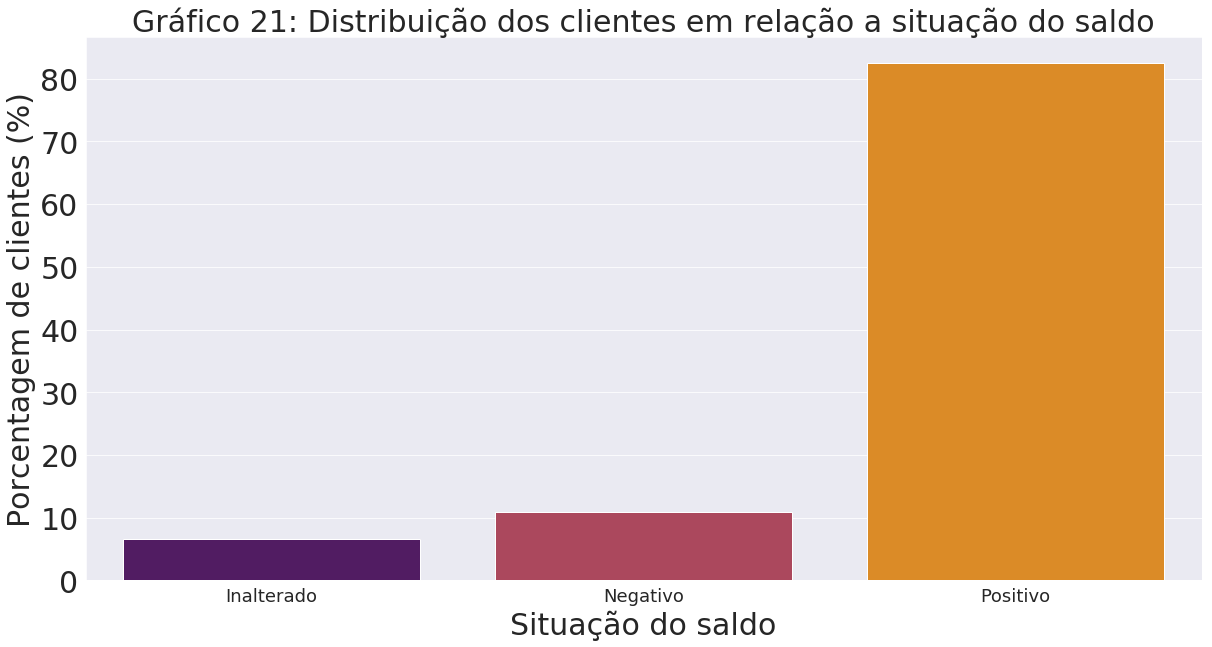

In [75]:
#--Construindo um gráfico de barras para apresentação dos resultados obtidos acima

#--Estética do gráfico

plt.figure(figsize=(20,10)) #Tamanho do gráfico 

plt.tick_params(axis = 'x', labelsize = 18) #Tamanho dos números do eixo y

plt.tick_params(axis = 'y', labelsize = 30) #Tamanho dos números do eixo y


#--Construindo o gráfico de barras
graf_barras = sb.barplot(x='Situação saldo', y='% Clientes', data = dados_saldo,  palette="inferno")


#--Modificando legenda dos eixos e inserindo título no gráfico
plt.xlabel('Situação do saldo',fontsize = 30)
plt.ylabel('Porcentagem de clientes (%)',fontsize = 30)
plt.title('Gráfico 21: Distribuição dos clientes em relação a situação do saldo',fontsize = 30)

#--Definindo o estilo do gráfico

sb.set_style("darkgrid")



<hr>

<p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
    <b>Cometário:</b> Dos clientes que contraíram um empréstimo imobiliário, a maioria apresenta um saldo médio anual positivo. 
</p>



<hr>

### Empréstimo pessoal

In [76]:
#--Obtendo a quantidade de clientes que fizeram empréstimo imobiliário e também fizeram seguro pessoal

porc_loan = []

#-Porcentagem dos clientes que fizeram seguro pessoal

porc_loan.append(round(100.0*clientes_imobiliario[clientes_imobiliario['loan']   == 'yes'].shape[0]/clientes_imobiliario.shape[0],2))


#-Porcentagem dos clientes que não fizeram seguro pessoal

porc_loan.append(round(100.0*clientes_imobiliario[clientes_imobiliario['loan']   == 'no'].shape[0]/clientes_imobiliario.shape[0],2))


In [77]:
#--Construindo data frame para organizar os resultados

dados_loan = pd.DataFrame(data = { 'Emprestimo pessoal':['sim', 'Não'], '% Clientes': porc_loan},\
                            columns= ['Emprestimo pessoal', '% Clientes'], index = ['',''])

#Mostrando os resultados
dados_loan

,Emprestimo pessoal,% Clientes
,sim,17.38
,Não,82.62


<hr>

<p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
    <b>Cometário:</b> A tabela acima mostra que a maioria dos clientes não possui empréstimo pessoal. 
</p>



<hr>

<p style='margin: 50px 50px;'>

<hr>

<p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
    <b>Resposta questão 6:</b> Do que foi apresentado, as características mais proeminentes dos clientes com  empréstimos  imobiliários serão resumidas a seguir: </p> 



<p style='margin: 30px 30px;'>
    
    
<ul>
 
<li> <p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'> Idade entre 32 e 45 anos, com mediana de 38 anos; </li>

<li> <p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'> Profissão "Blue-Collar";
    

<li> <p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'> Casado; 
    
<li> <p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'> Escolaridade no nível secundário; 
    
    
<li> <p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'> Não apresentam exigência de seguro de crédito;     
    

<li> <p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'> Saldo médio anual positivo; 


<li> <p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'> Sem empréstimo pessoal. 

</ul>
<hr>